# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'

import matplotlib.ticker
import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/Correlation_of_error_output_contribute_to_FA/'
base_directory_figure_str =  base_directory_str + '/figures/Correlation_of_error_output_contribute_to_FA/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch


def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cpu


# Load MNIST

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )







str_dir_data_mnist = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(str_dir_data_mnist , "/content/mnist_data" )





In [ ]:

batch_size = 1000


train_loader50_shuffle , test_loader50_shuffle , code_map50_shuffle , x_shape50_shuffle   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = True )


train_loader50 , test_loader50 , code_map50 , x_shape50   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = False )



Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



# calculate autocorrelation matrix

In [ ]:
def calculate_autocorrelation_layer(  categories_kmo , categories_k ,   delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):



  autocorrelation_L_n  =  L_lm1_kmo.shape[0]*L_lm1_k.shape[0]
  autocorrelation_delta_n =  delta_lp1_kmo.shape[0]*delta_lp1_k.shape[0]

  autocorrelation_delta = torch.matmul ( delta_lp1_kmo , delta_lp1_k.t()  ).sum()
  autocorrelation_L=torch.matmul ( L_lm1_kmo , L_lm1_k.t()  ).sum() 



  within_category_autocorrelation_delta = 0
  between_category_autocorrelation_delta = 0

  within_category_autocorrelation_L = 0
  between_category_autocorrelation_L= 0



  within_category_autocorrelation_delta_n = 0
  between_category_autocorrelation_delta_n = 0

  within_category_autocorrelation_L_n  = 0
  between_category_autocorrelation_L_n = 0



  for digit1 in range(10):
      
   
        delta_lp1_k_digit0 = delta_lp1_k[categories_k==digit1,:]
        delta_lp1_kmo_digit1 = delta_lp1_kmo[categories_kmo==digit1,:]

        

        L_lm1_k_digit0 = delta_lp1_k[categories_k==digit1,:]
        L_lm1_kmo_digit1 = delta_lp1_kmo[categories_kmo==digit1,:]


     

        within_category_autocorrelation_delta    += torch.matmul ( delta_lp1_kmo_digit1 , delta_lp1_k_digit0.t()  ).sum()
        within_category_autocorrelation_delta_n  += delta_lp1_kmo_digit1.shape[0]*delta_lp1_k_digit0.shape[0]


        within_category_autocorrelation_L   += torch.matmul ( L_lm1_kmo_digit1 , L_lm1_k_digit0.t()  ).sum()
        within_category_autocorrelation_L_n += L_lm1_kmo_digit1.shape[0]*L_lm1_k_digit0.shape[0]


      
    
  between_category_autocorrelation_delta   = autocorrelation_delta - within_category_autocorrelation_L
  between_category_autocorrelation_delta_n  = autocorrelation_delta_n  - within_category_autocorrelation_delta_n


  between_category_autocorrelation_L   = autocorrelation_L - within_category_autocorrelation_L
  between_category_autocorrelation_L_n = autocorrelation_L_n - within_category_autocorrelation_L_n



  between_category_autocorrelation_delta = between_category_autocorrelation_delta /between_category_autocorrelation_delta_n
  within_category_autocorrelation_delta = within_category_autocorrelation_delta /within_category_autocorrelation_delta_n


  between_category_autocorrelation_L = between_category_autocorrelation_L /between_category_autocorrelation_L_n
  within_category_autocorrelation_L = within_category_autocorrelation_L /within_category_autocorrelation_L_n



  output = {
            "autocorrelation_delta" : autocorrelation_delta ,
            "autocorrelation_L" :autocorrelation_L  ,

            "between_category_autocorrelation_delta" :between_category_autocorrelation_delta,
            "within_category_autocorrelation_delta" :within_category_autocorrelation_delta,

            "between_category_autocorrelation_L" :between_category_autocorrelation_L,
            "within_category_autocorrelation_L" :within_category_autocorrelation_L,
            
                     
            "between_category_autocorrelation_delta_n" :between_category_autocorrelation_delta_n,
            "within_category_autocorrelation_delta_n" :within_category_autocorrelation_delta_n,
            "between_category_autocorrelation_L_n" :between_category_autocorrelation_L_n,
            "within_category_autocorrelation_L_n" :within_category_autocorrelation_L_n,


   }

  return     output



In [ ]:





def calculate_alignment_term_o_l_k_no_last_delta( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l    ):


  k=-1

  return calculate_alignment_term_no_last_delta( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] 
                                  ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] 
                                  )




def calculate_alignment_term_no_last_delta( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k    ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 



  return alignment_term_o_l_k


  







def calculate_alignment_term_o_l_k( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l   , eta_2 ):


  k=-1

  return calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )



def calculate_alignment_term_linear(    B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  alignment_term_o_l_k  )

  return alignment_term_o_l_k


def calculate_transformation_matrix_linear(    delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):


  

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )



  return alignment_term_o_l_k



def calculate_alignment_term_linear_diagonal(        B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  alignment_term_o_l_k  =  torch.diag(alignment_term_o_l_k.diagonal())

  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  alignment_term_o_l_k  )

  return alignment_term_o_l_k


def calculate_transformation_matrix_linear_diagonal(       delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )


  alignment_term_o_l_k  =  torch.diag(alignment_term_o_l_k.diagonal())

 

  return alignment_term_o_l_k

  

def calculate_alignment_term( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k




#zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k
def calculate_alignment_term_zeta( Dfunc ,  zeta_o_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k




def calculate_last_term_l_no_last_delta(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l      ):

  

   return calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = net.bias_vec [l]   )



def calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k     ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return  func( zeta_k_l_k.t()  )    






def calculate_last_term_l(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l  ,  delta_k_l  , eta  ):

  

   return calculate_last_term(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = net.bias_vec [l] ,  delta_lp1_k = delta_k_l[-1][l+1]  , eta = eta  )



def calculate_last_term(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k  ,  delta_lp1_k  , eta  ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return torch.matmul(   func( zeta_k_l_k.t()  )    ,   delta_lp1_k  ) * eta



def calculate_auto_correlation_neurons(   matrix_kmo , matrix_k  ):

  all_ones = torch.ones( [ matrix_kmo.shape[0] , matrix_k.shape[0]   ]  ).to(device)
  



  return torch.matmul(  torch.matmul(  matrix_kmo.t()   ,   all_ones  )    ,   matrix_k  ) .diag() /  matrix_k.shape[0] /  matrix_kmo.shape[0]







In [ ]:
def within_between_category_sum_product_similarity_L_delta(     similarity_delta , similarity_L , targets_kmo ,  targets_k     ):

    
    sum_product_within = 0
    sum_product_between = 0

    for digit1 in range(10):
      for digit2 in range(10):

        


            digit1_indices = torch.where(targets_kmo==digit1)[0]
            digit2_indices = torch.where(targets_k==digit2)[0]


            sum_product = torch.mul( similarity_delta[ digit1_indices  ][:,      digit2_indices  ] ,  similarity_L[ digit1_indices  ][:,      digit2_indices  ]   ).sum()

            if digit1 != digit2:

              sum_product_between+= sum_product



            if digit1 == digit2:

              sum_product_within+= sum_product

    return     sum_product_within ,  sum_product_between 




In [ ]:


def shuffled_similarity_matrix(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
        
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    



     

  similarity_matrix = similarity_matrix [  torch.randperm( similarity_matrix.size()[0])   ]



  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix
  # print(  categories   )

# shuffled_similarity_matrix_within(   delta_lp1_kmo = train_tensor_original, delta_lp1_k = train_tensor_original , targets_kmo = targets_tensor_original ,  targets_k = targets_tensor_original )  




def shuffled_similarity_matrix_within(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
  categories = torch.zeros_like(similarity_matrix)              
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    
  for digit1 in range(10):
    


    # print(targets_tensor_original)
    digit_indices1 = torch.where(targets_kmo==digit1)[0]
    digit_indices2 = torch.where(targets_k==digit1)[0]


    categories[digit_indices1] = categories[digit_indices1] + digit1*10
    categories[: , digit_indices2] = categories[: , digit_indices2] + digit1

  categories = categories.reshape([-1])

  for digit1 in range(10):
    

      # if digit1==digit2:
        indices = torch.where ( digit1*10+digit1 == categories  )[0]

        indices_shuffle = indices [  torch.randperm( indices.size()[0])   ]


        similarity_matrix[indices]  =  similarity_matrix[indices_shuffle]
        # categories[indices]  =  categories[indices_shuffle]

  
  # categories = categories.reshape(  similarity_matrix_initial_shape   )
  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix



def shuffled_similarity_matrix_between(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
  categories = torch.zeros_like(similarity_matrix)              
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    
  for digit1 in range(10):
    


    # print(targets_tensor_original)
    digit_indices1 = torch.where(targets_kmo==digit1)[0]
    digit_indices2 = torch.where(targets_k==digit1)[0]


    categories[digit_indices1] = categories[digit_indices1] + digit1*10
    categories[: , digit_indices2] = categories[: , digit_indices2] + digit1

  categories = categories.reshape([-1])

  for digit1 in range(10):
     for digit2 in range(10):

        if digit1!=digit2:
          indices = torch.where ( digit1*10+digit2 == categories  )[0]

          indices_shuffle = indices [  torch.randperm( indices.size()[0])   ]


          similarity_matrix[indices]  =  similarity_matrix[indices_shuffle]
          # categories[indices]  =  categories[indices_shuffle]

    
  # categories = categories.reshape(  similarity_matrix_initial_shape   )
  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix
  # print(  categories   )

# shuffled_similarity_matrix_within(   delta_lp1_kmo = train_tensor_original, delta_lp1_k = train_tensor_original , targets_kmo = targets_tensor_original ,  targets_k = targets_tensor_original )  

# Single run function

In [ ]:


def Single_run_function(str_dir_data_BASE 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 100
            , random_batch = False
           ):



  batch_size = 1000
  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                     , batch_size=batch_size , device = device  
                                                                                     , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )

# def Single_run_function(str_dir_data_BASE , train_loader , test_loader , code_map
#             , bias = True
#             , B_Norm_Match_During = False 
#             , initial_B_normalization = True
#             , Normalize_whole_W_ = None
#             , Normalize_Column_W_ = None
#             , lr = .0005
#             , N_repeat = 1
#             , save_details = False
#             , label_smoothing = None
#             , FA_method=True  
#             , skip_existing = False
#             , shuffle = False
#             , compare_with_BP = False
#            ):





  N_hidden = len(code_map[0][0])

  

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"

  # str_direction_disc = str_direction_disc + "(Linear)"

  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"

  if random_batch==True:
    str_direction_disc = str_direction_disc + "(random_batch)"


  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)

  N_signals = 15

  choose_list_x = [ 0 , 150 , 200 , 99 , 20 , 70 , 135 ,  66  , 43 , 180 , 110 , 111 , 112 , 88 , 32 , 2 , 224 , 220 , 201 , 202]
  choose_list_e = [ 0 , 2 , 3 , 8 , 10 ,11,13 , 14 , 17 , 22 , 23 , 25 , 28 , 33 , 34 ,38 , 41 , 42 , 45 ,49]
  choose_list_BATCH = [ 0 , 1 , 100 , 200 , 205 , 300 , 301 , 510,  666  , 777 , 959 , 1 , 1 , 1 ,1 , 1 , 1 , 55 ,700,501]


  E_signals =  torch.zeros( [ L_N_layers+1 , N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  delta_signals =  torch.zeros( [L_N_layers+1  ,  N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  L_signals =  torch.zeros( [L_N_layers+1  , N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )


  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  save_model_iterations = list(range(0,70)) +  list(range(1130,1260)) +  list(range(790,810))
  if save_details == True :

    
    sum_of_alignmenterms = {"temp" : 1}

    Detailes_of_activities_of_network = {
        
      "angle_last_term_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "angle_sum_last_term_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),


      "angle_remainder_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "norm_remainder_to_DW": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "angle_sum_remainder_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),




      "angle_T_supalign_1_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),

      "angle_sum_T_supalign_1_B": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),



      "angle_T_align_plus_T_supalign_dW": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "max_diff_T_align_plus_T_supalign_dW": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),



      "T_align_norms": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  ),
      "T_supalign_norms": torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )


    }



            
                     
         
            


############################

    sampling_iterations = [0,1,2,3,10,11,70,71,1200,1201,1202,1257,1258,1259,1260, 1261 , 5000 , 5001, 5030 , 5002, 5060 , 5061 , 5062] 

    for k in sampling_iterations :
      Detailes_of_activities_of_network["delta_matrix_sample_"+ str(k) ] = []
      Detailes_of_activities_of_network["L_matrix_sample_"+ str(k) ] = []
      Detailes_of_activities_of_network["target_matrix_sample_"+ str(k) ] = []


    autocorrelation_sampling_lags = []
    # autocorrelation_sampling_lags = []

    for o in autocorrelation_sampling_lags :
        
          Detailes_of_activities_of_network["autocorrelation_delta_"+ str(o)  ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
                                       


    for o in autocorrelation_sampling_lags :
   
          Detailes_of_activities_of_network["autocorrelation_L_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
                                       



    for o in autocorrelation_sampling_lags :
       
          Detailes_of_activities_of_network["between_category_autocorrelation_delta_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' ) 
                                       


    for o in autocorrelation_sampling_lags :
  
          Detailes_of_activities_of_network["within_category_autocorrelation_delta_"+ str(o) ] =torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
                                       


    for o in autocorrelation_sampling_lags :
    
          Detailes_of_activities_of_network["between_category_autocorrelation_L_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
          

    for o in autocorrelation_sampling_lags :
        
          Detailes_of_activities_of_network["within_category_autocorrelation_L_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
          


    for o in autocorrelation_sampling_lags :
    
          Detailes_of_activities_of_network["between_category_autocorrelation_delta_n_"+ str(o) ] =torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
          


    for o in autocorrelation_sampling_lags :
     
          Detailes_of_activities_of_network["within_category_autocorrelation_delta_n_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
          

    for o in autocorrelation_sampling_lags :
      
          Detailes_of_activities_of_network["between_category_autocorrelation_L_n_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
          
    for o in autocorrelation_sampling_lags :
        
          Detailes_of_activities_of_network["within_category_autocorrelation_L_n_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
          



    for o in autocorrelation_sampling_lags :
        for l in range(1,L_N_layers+1):
          Detailes_of_activities_of_network["autocorrelation_delta_neurons_"+ str(o) + "_" + str(l)] = torch.zeros( [layers_info[l] , N_layers +1 , N_repeat 
                                                                                                             , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
          
        

    for o in autocorrelation_sampling_lags :
        for l in range(2,L_N_layers+1):
          Detailes_of_activities_of_network["autocorrelation_delta_neurons_weighted_"+ str(o) + "_" + str(l)] = torch.zeros( [layers_info[l] , N_layers +1 , N_repeat 
                                                                                                             , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
          
        


    for o in autocorrelation_sampling_lags :
        for l in range(0,L_N_layers+1):
          Detailes_of_activities_of_network["autocorrelation_L_neurons_"+ str(o) + "_" + str(l)] = torch.zeros( [layers_info[l] , N_layers +1 , N_repeat 
                                                                                                          , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
                                    
########################


    alignment_term_sampling_k = [65  , 125  , 1261 , 3001 , 3070 ]

    alignment_term_sampling_k_max_o = 67

    for k in alignment_term_sampling_k:
      for o in range(   1   ,   np.min([k,alignment_term_sampling_k_max_o])      ):
        Detailes_of_activities_of_network["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
        Detailes_of_activities_of_network["random_data_angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')


    
    for l in range(1,L_N_layers+1):
      Detailes_of_activities_of_network[ "delta_norms_" + str(l) ] = torch.zeros( [ 60000 , N_repeat   , N_epoch ]  , device ='cpu')
                   


    sampling_lags = [1,59,60]



    for o in sampling_lags:
      Detailes_of_activities_of_network["angle_T_align_removing_well_disriminated_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')

      Detailes_of_activities_of_network["angle_T_align_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Detailes_of_activities_of_network["angle_sum_T_align_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      


      # # puting a  random B in stead of actual B of network at each iteration
      # Detailes_of_activities_of_network["angle_T_align_randomB_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu'  )
 

      # # # puting a constant (among iterations) random B in stead of actual B of network
      # # Detailes_of_activities_of_network["angle_T_align_constantrandomB_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # # Detailes_of_activities_of_network["angle_sum_T_align_constantrandomB_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )

      # # shuffling rows of f'(Z) and f'(zeta) in different orders 
      # Detailes_of_activities_of_network["angle_T_align_shuffle_fprime_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_shuffle_fprime_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      

      # # shuffling rows of delta[k]  
      # Detailes_of_activities_of_network["angle_T_align_shuffle_deltak_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      # Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltak_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      

      # # shuffling rows of delta[k] and delta[k-o] in different orders
      # Detailes_of_activities_of_network["angle_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )


      # # shuffling rows of delta[k] and delta[k-o] in the same order
      # Detailes_of_activities_of_network["angle_T_align_shuffle_deltakkmo_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltakkmo_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      

      # # shuffling rows of L[k] and L[k-o] in the same order
      # Detailes_of_activities_of_network["angle_T_align_shuffle_Lkkmo_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_shuffle_Lkkmo_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      





      # # neglecting nonlinearity
      # Detailes_of_activities_of_network["angle_T_align_linear_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_linear_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )



      # # neglecting nonlinearity mask dignal linear transformation matrix
      # Detailes_of_activities_of_network["angle_T_align_mask_linear_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_mask_linear_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )

      # # shuffling rows of delta[k] and L[k] in the same order and shuffling rows of delta[k-o] and L[k-o] in the same order
      # Detailes_of_activities_of_network["angle_T_align_shuffle_L_delta_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      # Detailes_of_activities_of_network["angle_sum_align_shuffle_L_delta_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )



      # # shuffling rows of delta[k] and delta[k-o] within category
      # Detailes_of_activities_of_network["angle_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )


      # # angle_sum_T_align_expected_neglecting_nonlinearity_
      # Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )



      # # angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_within
      # Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_shuffle_within_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_within_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )




      # # angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_between
      # Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_shuffle_between_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_between_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )



      # # angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_
      # Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_shuffle_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )


      # # sum_product_L_delta_
      # Detailes_of_activities_of_network["sum_product_L_delta_within_"+ str(o)] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["sum_product_L_delta_between_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )

      # Detailes_of_activities_of_network["sum_product_L_delta_within_shuffle_between_"+ str(o)] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["sum_product_L_delta_between_shuffle_between_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )

      # Detailes_of_activities_of_network["sum_product_L_delta_within_shuffle_within_"+ str(o)] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["sum_product_L_delta_between_shuffle_within_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )

      # Detailes_of_activities_of_network["sum_product_L_delta_within_shuffle_"+ str(o)] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )
      # Detailes_of_activities_of_network["sum_product_L_delta_between_shuffle_"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )


      for key in Detailes_of_activities_of_network:
        if type(Detailes_of_activities_of_network[key]) == type( torch.tensor([1]) ):
          Detailes_of_activities_of_network[key][:] = float('nan')

       #############################################
    
#####################
  p_saturated_fprime = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  p_zero_fprime = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )

  p_zero_delta_BP = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  p_zero_delta_FA = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )

  weight_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  dW_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  dW_norms_BP= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  delta_norms_FA= torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  delta_norms_BP= torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  E_norms_FA= torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  E_norms_BP= torch.zeros( [N_layers +1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )
######################


  change = 0

  test_accuracy_list_repeat = []
  eta_2 = lr*lr
  device0 = code_map[0].device
  my_coding.device = device0
  for rep in range(N_repeat):

    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )





    train_dataset = train_loader.dataset


    train_tensor = train_dataset.tensors[0].to(device)  
    targets_tensor = train_dataset.tensors[1].to(device)  











    if rep <=3:
      str_direction = str_dir_data_BASE_exp + "code_map_"  +  str(rep) +  ".txt"
      with open( str_direction  , "wb") as fp:   #Pickling
        pickle.dump( code_map  , fp)

    test_accuracy_list=[]
    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_k_l = []
      delta_BP_k_l = []
      # E_list_k_l = []
      L_k_l = []
      Z_k_l = []
      W_k_l = []
      target_k = []


      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)
    Dfunc = net.derivative_activation1

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  




    

    for epoch_i in range(N_epoch):



########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal


      test_accuracy_list. append(acc*100)

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
##########################################################
     







      
      targets_tensor= train_dataset.tensors[1].to(device0)
      train_tensor = train_dataset.tensors[0].to(device0) 



      L_f_k = net.forward(train_tensor)



      E_k  = targets_tensor - L_f_k 

      Delta_fa , Delta_bias_fa = net.BP_TRW(E_k) ########################################################################################## FA



      for l in range(1,L_N_layers+1):
        Detailes_of_activities_of_network[ "delta_norms_" + str(l) ] [ : , rep   , epoch_i ]  = net.delta_FA[l].norm(dim=1)




      # if  iteration_k == 1500:

      #   E_k_norms = net.delta_FA[-1].norm(dim=1)


      #   print('E_k_norms.mean()')

      #   print(E_k_norms.mean())

      #   # E_k_norms [ correct_classified_data ] =  E_k_norms [ correct_classified_data ] - 999999


        
      #   plt.hist(E_k_norms , bins=np.arange(0,3,0.1))
      #   plt.show()

      #   true_class_tensor = my_coding.decode_category(code_map , [targets_tensor.to(device0)   ] ).view([-1]  )
      #   digit = 0

      #   digit_indices = torch.where (   true_class_tensor == digit   )[0] 

      #   digit_norms = E_k_norms[digit_indices]

      #   sorted, sorted_digit_indices = torch.sort( digit_norms )

      #   targets_tensor_surogated = targets_tensor[  digit_indices [ sorted_digit_indices[   : 3000 ]    ]   ]
      #   train_tensor_surogated = train_tensor[ digit_indices [  sorted_digit_indices[   : 3000 ]   ]  ]

      #   for digit in range(1,10):

      #     digit_indices = torch.where (   true_class_tensor == digit   )[0] 

      #     digit_norms = E_k_norms[digit_indices]

      #     sorted, sorted_digit_indices = torch.sort( digit_norms )

      #     targets_tensor_surogated0 = targets_tensor[  digit_indices [ sorted_digit_indices[  : 3000 ]   ]   ]
      #     train_tensor_surogated0 = train_tensor[ digit_indices [  sorted_digit_indices[   :  3000  ]   ]  ]


      #     targets_tensor_surogated = torch.cat([targets_tensor_surogated , targets_tensor_surogated0] , dim=0)
      #     train_tensor_surogated = torch.cat([train_tensor_surogated , train_tensor_surogated0], dim=0)


      #   # targets_tensor_surogated =  targets_tensor [  correct_classified_data ] 
      #   # train_tensor_surogated =  train_tensor [  correct_classified_data ] 

      #   targets_tensor_surogated = torch.cat([targets_tensor_surogated , targets_tensor_surogated] , dim=0)
      #   train_tensor_surogated = torch.cat([train_tensor_surogated , train_tensor_surogated], dim=0)

      #   for digit in range(10):
      #     print( ( true_class_tensor ==  digit ).sum()   )  
        
      #   suffle_indeces= np.random.choice(60000,60000 , replace = False)

      #   targets_tensor_surogated = targets_tensor_surogated[suffle_indeces]
      #   train_tensor_surogated = train_tensor_surogated[suffle_indeces]



      #   true_class_tensor_surogated = my_coding.decode_category(code_map , [targets_tensor_surogated.to(device0)   ] ).view([-1]  )
      #   print('\n')
      #   for digit in range(10):
      #     print( ( true_class_tensor_surogated ==  digit ).sum()   )  



      #   # indices = torch.where (   correct_classified_data   )[0]

        
      #   # indices_n = []

      #   # for index in range(correct_classified_data.shape[0]):
      #   #   if not index in indices:
      #   #     indices_n.append(index)

      #   # indices_n = torch.tensor(indices_n)



      #   # train_tensor = train_tensor[ indices_n   ]
      #   # targets_tensor = targets_tensor[ indices_n   ]

      #   batch_size_0 = int ( train_tensor_surogated.shape[0] // 60 )
      #   print('batch_size_0')

      #   print(batch_size_0)
      #   print(train_tensor_surogated.shape)

        
        

      #   train_tensor_surogated = train_tensor_surogated[ : batch_size_0*60   ]
      #   targets_tensor_surogated = targets_tensor_surogated[ : batch_size_0*60     ]

      #   # E_k_norms = targets_tensor_surogated - net.forward(train_tensor_surogated)
      #   # E_k_norms = E_k_norms.norm(dim=1)

        
      #   # E_k_norms [ correct_classified_data ] =  E_k_norms [ correct_classified_data ] - 999999


        




        
      #   train_dataset = torch.utils.data.TensorDataset(   train_tensor_surogated.to('cpu')    , targets_tensor_surogated.to('cpu')     )


      #   train_loader = torch.utils.data.DataLoader( dataset=train_dataset , batch_size= batch_size_0 , shuffle=shuffle , num_workers=0 , pin_memory=True )

      #   # net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
      #   # net.set_learning_rate(lr)
      #   # str_direction = str_dir_data_BASE_exp + "network_k_" +  str(0) +  "_" + str(rep) + "_.txt"
      #   # net.load_model(str_direction)


        
      #   targets_tensor= train_dataset.tensors[1].to(device0)
      #   train_tensor = train_dataset.tensors[0].to(device0) 



      #   L_f_k = net.forward(train_tensor)



      #   E_k  = targets_tensor - L_f_k 

      #   Delta_fa , Delta_bias_fa = net.BP_TRW(E_k) ########################################################################################## FA


      #   E_k_norms = net.delta_FA[-1].norm(dim=1)

      #   plt.hist(E_k_norms , bins=np.arange(0,3,0.1))
      #   plt.show()
      #   print('E_k_norms.mean()')

      #   print(E_k_norms.mean())


      ########################################################## Train  
      for iter , (x_in, y_n) in enumerate( train_loader ):




        # if iteration_k >= 1440 and iteration_k<1500:
  

        #   device0 = code_map[0].device
        #   my_coding.device = device0
        #   targets_tensor= train_dataset.tensors[1].to(device0)
        #   train_tensor = train_dataset.tensors[0].to(device0) 

        #   L_f_k = net.forward(train_tensor)

        #   true_class_tensor = my_coding.decode_category(code_map , [targets_tensor.to(device0)   ] ).view([-1]  )
        #   predicted_class_tensor = my_coding.decode_category(code_map , [  L_f_k.to(device0)   ] ).view([-1]  )

        #   if iteration_k == 1440:
        #     correct_classified_data = (true_class_tensor == predicted_class_tensor)
        #     print( correct_classified_data.sum()     )
        #   else:

        #     correct_classified_data = torch.logical_and( correct_classified_data  , (true_class_tensor == predicted_class_tensor) )
        #     print(  (true_class_tensor == predicted_class_tensor).sum()   ,   correct_classified_data.sum()  )



        # if iteration_k >= 2940 and iteration_k<3000:
  

        #   device0 = code_map[0].device
        #   my_coding.device = device0
        #   targets_tensor= train_dataset.tensors[1].to(device0)
        #   train_tensor = train_dataset.tensors[0].to(device0) 

        #   L_f_k = net.forward(train_tensor)

        #   true_class_tensor = my_coding.decode_category(code_map , [targets_tensor.to(device0)   ] ).view([-1]  )
        #   predicted_class_tensor = my_coding.decode_category(code_map , [  L_f_k.to(device0)   ] ).view([-1]  )

        #   if iteration_k == 2940:
        #     correct_classified_data = (true_class_tensor == predicted_class_tensor)
        #     print( correct_classified_data.sum()     )
        #   else:

        #     correct_classified_data = torch.logical_and( correct_classified_data  , (true_class_tensor == predicted_class_tensor) )
        #     print(  (true_class_tensor == predicted_class_tensor).sum()   ,   correct_classified_data.sum()  )









        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        

        for persist_i in range(persistence):

          if iteration_k in save_model_iterations:
            str_direction = str_dir_data_BASE_exp + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
            net.save_model(str_direction)


 
          if save_details == True :
            W_l = []
            target_k .append( my_coding.decode_category( code_map , [ y_n ]  ).view([-1]  ).to('cpu').clone()  )
            for l in range(L_N_layers):
              W_l .append(  net.W[l].detach().clone() )
            W_k_l . append(  W_l   )
            



          # if save_details == True :
          #   for k in range(1,N_layers+1):
          #     p_saturated_fprime[  k  ,  rep  ,  iteration_k ] = ( (  1*(net.Z[k]>1.2))!=0 ).sum() / net.Z[k].shape[0] / net.Z[k].shape[1]
          #     p_zero_fprime[  k  ,  rep  ,  iteration_k ] = (net.Z[k]<=0 ).sum() / net.Z[k].shape[0] / net.Z[k].shape[1]


          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          

             
          # for k in range(N_layers):
          #   weight_norms[  k  ,  rep  ,  iteration_k  ] =  net.W[k] .norm()

          L_f = net.forward(x_in)


          E = y_n - L_f

          if compare_with_BP==True or FA_method==False:
            Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP
          
          # if save_details == True :
          #   delta_BP_l = [] 
          #   delta_BP_l.append(None)
          #   for l in range(1,N_layers+1):
          #     delta_BP_l.append(net.delta_BP[l].clone())


          # if save_details == True :
          #   for k in range(1,N_layers+1):
          #     p_zero_delta_BP[  k  ,  rep  ,  iteration_k ] = ( (  1*(net.delta_BP[k] < 0))!=0 ).sum() / net.delta_BP[k].shape[0] / net.delta_BP[k].shape[1]
  
          
          #   for l in range(1,N_layers+1):
          #     delta_norms_BP[  l  ,  rep  ,  iteration_k ]  = net.delta_BP[l].norm()
          #     E_norms_BP[  l  ,  rep  ,  iteration_k ]  = net.E_BP[l].norm()

          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          

          # if save_details == True :
          #   for k in range(1,N_layers+1):
          #     p_zero_delta_FA[  k  ,  rep  ,  iteration_k ] = ( (  1*(net.delta_FA[k] < 0))!=0 ).sum() / net.delta_FA[k].shape[0] / net.delta_FA[k].shape[1]


################################################## Update Weights

          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  


          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:

              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)


          # for l in range(1,N_layers+1):
          #   delta_norms_FA[  l  ,  rep  ,  iteration_k ]  = net.delta_FA[l].norm()
          #   E_norms_FA[  l  ,  rep  ,  iteration_k ]  = net.E_FA[l].norm()



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()


          if compare_with_BP==True :
            for l in range(N_layers):
              angle_dW_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

            for l in range(1,N_layers+1):
              angle_dBiad_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
##################################################             

          if random_batch==True:

            random_indices = np.random.choice( 60000 , 1000 , replace=False)
            train_tensor_random_batch  =  train_tensor [random_indices].to(device)
            targets_tensor_random_batch = targets_tensor[random_indices] .to(device)     
            L_f = net.forward(train_tensor_random_batch)
            E = targets_tensor_random_batch - L_f
            Delta_fa , Delta_bias_fa = net.BP_TRW(E)


          
          if save_details == True :
            
            if iteration_k in sampling_iterations :

              Detailes_of_activities_of_network["code_map" ] =   code_map.copy()

              Detailes_of_activities_of_network["delta_matrix_sample_"+ str(iteration_k) ].append(net.delta_FA.copy())
              Detailes_of_activities_of_network["L_matrix_sample_"+ str(iteration_k) ] .append(  net.L.copy()   )
              Detailes_of_activities_of_network["target_matrix_sample_"+ str(iteration_k) ] .append(  target_k[-1].clone()   )



#################### sampling autocorrelation     
            if False:
              for o in autocorrelation_sampling_lags :
                if iteration_k > o :
                  for l in range(1,L_N_layers+1):
                    Detailes_of_activities_of_network["autocorrelation_delta_neurons_"+ str(o) + "_" + str(l)] [: ,l , rep ,  iteration_k ]  = calculate_auto_correlation_neurons(   delta_k_l[-1-o][l] 
                                                                                                                                                                  , delta_k_l[-1][l]  )
              
              
              for o in autocorrelation_sampling_lags :
                if iteration_k > o :
                  for l in range(2,L_N_layers+1):
                    autocorrelation_delta_weighted  = calculate_transformation_matrix_linear(    delta_lp1_kmo  =  delta_k_l[-1-o][l]  
                                                          ,  L_lm1_kmo  = L_k_l[-1-o][l-2]
                                                          , L_lm1_k = L_k_l[-1][l-2]  ,  delta_lp1_k = delta_k_l[-1][l]   ) 
                    
                    autocorrelation_delta_weighted = autocorrelation_delta_weighted.diag()/  delta_k_l[-1-o][l] .shape[0] /  delta_k_l[-1-o][l] .shape[0]
                    
                    Detailes_of_activities_of_network["autocorrelation_delta_neurons_weighted_"+ str(o) + "_" + str(l)] [: ,l , rep ,  iteration_k ]  = autocorrelation_delta_weighted



                      
              for o in autocorrelation_sampling_lags :
                if iteration_k > o :
                  for l in range(0,L_N_layers+1):
                    Detailes_of_activities_of_network["autocorrelation_L_neurons_"+ str(o) + "_" + str(l)] [: ,l , rep ,  iteration_k ] = calculate_auto_correlation_neurons(   L_k_l[-1-o][l] 
                                                                                                                                                            , L_k_l[-1][l]   )

              for o in autocorrelation_sampling_lags :
                if iteration_k > o :
                  for l in range(1,L_N_layers):


                    output = calculate_autocorrelation_layer(  categories_kmo = target_k[-1-o] 
                                                            , categories_k = target_k[-1]
                                                            ,   delta_lp1_kmo =  delta_k_l[-1-o][l + 1]    
                                                            ,  L_lm1_kmo = L_k_l[-1-o][l-1]
                                                            , L_lm1_k =L_k_l[-1][l-1]
                                                            ,  delta_lp1_k = delta_k_l[-1][l+1] )
              

                    Detailes_of_activities_of_network["autocorrelation_delta_"+ str(o)  ] [l , rep ,  iteration_k ] = output["autocorrelation_delta"]
                    Detailes_of_activities_of_network["autocorrelation_L_"+ str(o)  ] [l , rep ,  iteration_k ] = output["autocorrelation_L"]
                    Detailes_of_activities_of_network["between_category_autocorrelation_delta_"+ str(o)  ] [l , rep ,  iteration_k ] = output["between_category_autocorrelation_delta"]
                    Detailes_of_activities_of_network["within_category_autocorrelation_delta_"+ str(o)  ] [l , rep ,  iteration_k ] = output["within_category_autocorrelation_delta"]
                    Detailes_of_activities_of_network["between_category_autocorrelation_L_"+ str(o)  ] [l , rep ,  iteration_k ] = output["between_category_autocorrelation_L"]
                    Detailes_of_activities_of_network["within_category_autocorrelation_L_"+ str(o)  ] [l , rep ,  iteration_k ] = output["within_category_autocorrelation_L"]

                    Detailes_of_activities_of_network["between_category_autocorrelation_delta_n_"+ str(o)  ] [l , rep ,  iteration_k ] = output["between_category_autocorrelation_delta_n"]
                    Detailes_of_activities_of_network["within_category_autocorrelation_delta_n_"+ str(o)  ] [l , rep ,  iteration_k ] = output["within_category_autocorrelation_delta_n"]
                    Detailes_of_activities_of_network["between_category_autocorrelation_L_n_"+ str(o)  ] [l , rep ,  iteration_k ] = output["between_category_autocorrelation_L_n"]
                    Detailes_of_activities_of_network["within_category_autocorrelation_L_n_"+ str(o)  ] [l , rep ,  iteration_k ] = output["within_category_autocorrelation_L_n"]
####################


  

                  

              

          if save_details == True :
    
          #   for l in range(N_layers):
          #     dW_norms[  l  ,  rep  ,  iteration_k   ] = lr*Delta_fa[l].norm()
          #     dW_norms_BP[  l  ,  rep  ,  iteration_k   ] = lr*Delta_bp[l].norm()


            delta_l = []
            # E_l = []
            L_l = []
            Z_l = []




            for l in range(L_N_layers+1):
              if net.L[l].shape[0] != 1000:
                L_matrix = torch.zeros( [ 1000 , net.L[l].shape[1]  ]   )
                L_matrix[ 0:net.L[l].shape[0] ,  :] = net.L[l].detach().clone()
              else:
                L_matrix = net.L[l].detach().clone()

              L_l .append( L_matrix  )

            delta_l.append(None)
            # E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              if net.L[l].shape[0] != 1000:
          

                if FA_method==True:
                  delta_FA_matrix = torch.zeros([ 1000 , net.delta_FA[l].shape[1]  ])
                  delta_FA_matrix[ 0:net.delta_FA[l].shape[0] ,  :]  = net.delta_FA[l].detach().clone()

                else:
                  delta_BP_matrix = torch.zeros([ 1000 , net.delta_BP[l].shape[1]  ])
                  delta_BP_matrix[ 0:net.delta_BP[l].shape[0] ,  :]  = net.delta_BP[l].detach().clone()


              else:
                

                if FA_method==True:
                
                  delta_FA_matrix = net.delta_FA[l].detach().clone()
                else:
                  delta_BP_matrix = net.delta_BP[l].detach().clone()
                  

              if FA_method==True:
                delta_l.append( delta_FA_matrix )
              else:
                delta_l.append( delta_BP_matrix )




              if net.Z[l].shape[0] != 1000:
                Z_matrix = torch.zeros([ 1000 , net.Z[l].shape[1]  ])
                Z_matrix[ 0:net.Z[l].shape[0] ,  :] = net.Z[l].detach().clone()
              else:
                Z_matrix = net.Z[l].detach().clone()


              Z_l .append(Z_matrix)



            delta_k_l . append(  delta_l  )
            # delta_BP_k_l.append(  delta_BP_l  )
            # E_list_k_l . append(  E_l   )
            L_k_l . append(  L_l   )
            Z_k_l . append(  Z_l   )

            


            if  iteration_k in alignment_term_sampling_k :

              for  l in range(1,L_N_layers):
                for o in range(   1   ,   np.min([ iteration_k  , alignment_term_sampling_k_max_o  ])      ):
                  k=-1

                  alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                      ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                      ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                      ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                          
                  # alignment_term = calculate_alignment_term_linear(
                  #                   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                  #                   ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                  #                   ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )

                  Detailes_of_activities_of_network["angle_T_align_"+ str(o) + "_" +  str(iteration_k)  +"_B"] [l , rep  ]   = my_weight.angle(   alignment_term   , net.B[l].t()   ) 











            if iteration_k>0  and (  np.random.rand() < 0.2 )   :
              
           
                for  l in range( 1 , L_N_layers  ):

                  for o in sampling_lags :

                    if o <= iteration_k:
                      k=-1

###################################################################################################################
                      # calculating actual alignment term 
                      if True:
                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        

                        
      
                        alignment_term_actual = alignment_term.clone()
                        
                        


                        if "angle_T_align_"+ str(o) +"_B" in  Detailes_of_activities_of_network:
                          Detailes_of_activities_of_network["angle_T_align_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   ) 
                        else:
                          Detailes_of_activities_of_network["angle_T_align_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )

                          Detailes_of_activities_of_network["angle_T_align_"+ str(o) +"_B"][:] = float('nan')
                          Detailes_of_activities_of_network["angle_T_align_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   ) 



                          
                        if "angle_sum_T_align_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(   sum_of_alignmenterms["angle_sum_T_align_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )

###################################################################################################################
                      # calculating actual alignment term 
                      if True:



                        data_delta_norms_k = delta_k_l[k][-1].norm(dim=1)
                        sorted, sorted_digit_indices_k = torch.sort( data_delta_norms_k )
                        sorted_digit_indices_k_0 = sorted_digit_indices_k [600: ] 
                        sorted_digit_indices_k_1 = sorted_digit_indices_k [ :200]


                        data_delta_norms_kmo = delta_k_l[k-o][-1].norm(dim=1)
                        sorted, sorted_digit_indices_kmo = torch.sort( data_delta_norms_kmo )
                        sorted_digit_indices_kmo_0 = sorted_digit_indices_kmo [600: ]
                        sorted_digit_indices_kmo_1 = sorted_digit_indices_kmo [ :200]

                        Z_l_kmo = Z_k_l[k-o][l].clone().detach()
                        # Z_l_kmo[ sorted_digit_indices_kmo_0 , :] =  Z_l_kmo[ sorted_digit_indices_kmo_1 , :] 
                        Z_l_kmo[ sorted_digit_indices_kmo_0 , :] =  0



                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone().detach()
                        # delta_lp1_kmo[ sorted_digit_indices_kmo_0 , :] =  delta_lp1_kmo[ sorted_digit_indices_kmo_1 , :] 
                        delta_lp1_kmo[ sorted_digit_indices_kmo_0 , :] =  0


                        L_lm1_kmo = L_k_l[k-o][l-1].clone().detach()
                        # L_lm1_kmo[ sorted_digit_indices_kmo_0 , :] =  L_lm1_kmo[ sorted_digit_indices_kmo_1 , :] 
                        L_lm1_kmo[ sorted_digit_indices_kmo_0 , :] =  0




                        L_lm1_k = L_k_l[k][l-1].clone().detach()
                        # L_lm1_k[ sorted_digit_indices_k_0 , :] =  L_lm1_k[ sorted_digit_indices_k_1 , :] 
                        L_lm1_k[ sorted_digit_indices_k_0 , :] =  0


                        delta_lp1_k = delta_k_l[k][l+1].clone().detach()
                        # delta_lp1_k[ sorted_digit_indices_k_0 , :] =  delta_lp1_k[ sorted_digit_indices_k_1 , :] 
                        delta_lp1_k[ sorted_digit_indices_k_0 , :] =  0



                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_l_kmo
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_lp1_kmo
                                    ,  L_lm1_kmo = L_lm1_kmo , L_lm1_k = L_lm1_k
                                    ,  delta_lp1_k = delta_lp1_k , eta_2 = eta_2 )
                        

                        
      
                        alignment_term_actual = alignment_term.clone()
                        
                        



                        Detailes_of_activities_of_network["angle_T_align_removing_well_disriminated_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   ) 

          
###################################################################################################################
                      # puting a  random B in stead of actual B of network at each iteration
                      if False:
                        random_B = torch.randn_like( net.B[l]) *0.1
                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = random_B  , delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        


                        Detailes_of_activities_of_network["angle_T_align_randomB_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , random_B.t()   )

###################################################################################################################
                      # puting a constant (among iterations) random B in stead of actual B of network
                      if False:

                        if "constant_randomB_"+ str(o) +"_" + str(l)  in  sum_of_alignmenterms:
                          constant_random_B  =  sum_of_alignmenterms["constant_randomB_"+ str(o) +"_" + str(l)] 
                        else:
                          sum_of_alignmenterms["constant_randomB_"+ str(o) +"_" + str(l)] =   torch.randn_like( net.B[l]) *0.1 

                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = sum_of_alignmenterms["constant_randomB_"+ str(o) +"_" + str(l)]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_constantrandomB_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term  
                                                                                                        , sum_of_alignmenterms["constant_randomB_"+ str(o) +"_" + str(l)] .t()   )
                        
                        if "angle_sum_T_align_constantrandomB_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_constantrandomB_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_constantrandomB_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_constantrandomB_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                    sum_of_alignmenterms["angle_sum_T_align_constantrandomB_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                      , sum_of_alignmenterms["constant_randomB_"+ str(o) +"_" + str(l)].t()   )


####################################################################################################################
                      # shuffling rows of f'(Z) and f'(zeta) in different orders 
                      if False:
                        W_lm1_kmo = W_k_l[k-o][l-1] .clone()
                        b_l_k = net.bias_vec [l] .clone()
                        L_lm1_k = L_k_l[k][l-1].clone()
                        zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k

                        zeta_o_l_k=zeta_o_l_k[torch.randperm(zeta_o_l_k.size()[0])]

                        Z_l_kmo = Z_k_l[k-o][l].clone()
                        Z_l_kmo=Z_l_kmo[torch.randperm(Z_l_kmo.size()[0])]

                        alignment_term = calculate_alignment_term_zeta( Dfunc = Dfunc , zeta_o_l_k = zeta_o_l_k ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_shuffle_fprime_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_shuffle_fprime_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_fprime_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_fprime_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_shuffle_fprime_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                                    sum_of_alignmenterms["angle_sum_T_align_shuffle_fprime_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )
                        


####################################################################################################################
                      # shuffling rows of delta[k]  
                      if False:
                        delta_lp1_k = delta_k_l[k][l+1].clone()

                        delta_lp1_k = delta_lp1_k[ torch.randperm( delta_lp1_k.size()[0])]


                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_lp1_k , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_shuffle_deltak_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_shuffle_deltak_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltak_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltak_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltak_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                                                      sum_of_alignmenterms["angle_sum_T_align_shuffle_deltak_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )
                        

####################################################################################################################
                      # shuffling rows of delta[k] and delta[k-o] in different orders ["angle_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_B"]
                      if True:
                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()

                        randperm = torch.randperm( delta_lp1_k.size()[0])


                        delta_lp1_k = delta_lp1_k[ randperm ]

                        randperm = torch.randperm( delta_lp1_kmo.size()[0])
                        delta_lp1_kmo = delta_lp1_kmo[ randperm ]



                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_lp1_kmo
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_lp1_k , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                                                      sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_diff_orders_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )




####################################################################################################################
                      # shuffling rows of delta[k] and delta[k-o] in the same order
                      if False:
                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()

                        randperm = torch.randperm( delta_lp1_k.size()[0])


                        delta_lp1_k = delta_lp1_k[ randperm ]


                        # randperm = torch.randperm( delta_lp1_kmo.size()[0])
                        delta_lp1_kmo = delta_lp1_kmo[ randperm ]



                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_lp1_kmo
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_lp1_k , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_shuffle_deltakkmo_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_shuffle_deltakkmo_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltakkmo_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                                                      sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )



####################################################################################################################
                      # shuffling rows of L[k] and L[k-o] in the same order
                      if False:
                        delta_lp1_k = delta_k_l[k][l+1]
                        delta_lp1_kmo = delta_k_l[k-o][l+1]
                        L_lm1_kmo = L_k_l[k-o][l-1]
                        L_lm1_k = L_k_l[k][l-1]

                        randperm = torch.randperm( L_lm1_kmo.size()[0])


                        L_lm1_kmo = L_lm1_kmo[ randperm ]
                        L_lm1_k = L_lm1_k[ randperm ]



                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_lp1_kmo
                                    ,  L_lm1_kmo = L_lm1_kmo , L_lm1_k = L_lm1_k
                                    ,  delta_lp1_k = delta_lp1_k , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_shuffle_Lkkmo_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_shuffleLkkmo_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_shuffleLkkmo_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_shuffleLkkmo_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_shuffle_Lkkmo_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                                                      sum_of_alignmenterms["angle_sum_T_align_shuffleLkkmo_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )




####################################################################################################################
                      # neglecting nonlinearity
                      if False:
                        alignment_term = calculate_alignment_term_linear(
                                    B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        


      
                        alignment_term_neglecting_nonlinearity = alignment_term.clone()
                        Detailes_of_activities_of_network["angle_T_align_linear_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_linear_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_linear_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_linear_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_linear_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(   sum_of_alignmenterms["angle_sum_T_align_linear_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )
                        



####################################################################################################################     
                      # angle_T_align_expected_neglecting_nonlinearity_
                      if False:
                        k=-1
                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()
                        L_lm1_kmo = L_k_l[k-o][l-1].clone()
                        L_lm1_k = L_k_l[k][l-1].clone()

                        S_delta = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
                        S_L = torch.matmul( L_lm1_kmo , L_lm1_k.t())

                        t_align_b_dot_product = torch.mul(S_delta , S_L).sum()*L_k_l[k-o][l].shape[1]*0.1*0.1*eta_2

                        cosine_similarity = t_align_b_dot_product / net.B[l].norm()/alignment_term_neglecting_nonlinearity.norm()


                        angle = 180  /np.pi *torch.arccos( cosine_similarity )


                        Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_B"][l , rep ,  iteration_k ] = angle
                        


####################################################################################################################  
                      # sum_product_L_delta_
                      if  False:
                        k=-1
                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()
                        L_lm1_kmo = L_k_l[k-o][l-1].clone()
                        L_lm1_k = L_k_l[k][l-1].clone()

                        S_delta = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
                        S_L = torch.matmul( L_lm1_kmo , L_lm1_k.t())

                        sum_product_within ,  sum_product_between  = within_between_category_sum_product_similarity_L_delta(   similarity_delta = S_delta
                                                                                                                            ,  similarity_L = S_L
                                                                                                                            ,  targets_kmo =    target_k[k-o] 
                                                                                                                            ,  targets_k =     target_k[k]       ) 
                                                  
                        Detailes_of_activities_of_network["sum_product_L_delta_within_"+ str(o)][l , rep ,  iteration_k ]  = sum_product_within
                        Detailes_of_activities_of_network["sum_product_L_delta_between_"+ str(o) ][l , rep ,  iteration_k ]  = sum_product_between



                        # if "angle_sum_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                        #   sum_of_alignmenterms["angle_sum_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        # else:
                        #   sum_of_alignmenterms["angle_sum_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        # Detailes_of_activities_of_network["angle_sum_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                        #                                                               sum_of_alignmenterms["angle_sum_T_align_expected_neglecting_nonlinearity_"+ str(o) +"_" + str(l) +"_B"]  
                        #                                                                                         , net.B[l].t()   )   


####################################################################################################################  
                      # angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_within
                      if False:

                        k=-1
                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()
                        L_lm1_kmo = L_k_l[k-o][l-1].clone()
                        L_lm1_k = L_k_l[k][l-1].clone()

                        # S_delta = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())

                        S_delta = shuffled_similarity_matrix_within(   delta_lp1_kmo = delta_lp1_kmo  , delta_lp1_k = delta_lp1_k , targets_kmo = target_k[k-o] ,  targets_k = target_k[k] )


                        S_L = torch.matmul( L_lm1_kmo , L_lm1_k.t())

                        t_align_b_dot_product = torch.mul(S_delta , S_L).sum()*L_k_l[k-o][l].shape[1]*0.1*0.1*eta_2

                        cosine_similarity = t_align_b_dot_product / net.B[l].norm()/alignment_term_neglecting_nonlinearity.norm()


                        angle = 180  /np.pi *torch.arccos( cosine_similarity )


                        Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_shuffle_within_"+ str(o) +"_B"][l , rep ,  iteration_k ] = angle
          
        
                                    # sum_product_L_delta_
                        sum_product_within ,  sum_product_between  = within_between_category_sum_product_similarity_L_delta(   similarity_delta = S_delta
                                                                                                                            ,  similarity_L = S_L
                                                                                                                            ,  targets_kmo =    target_k[k-o]
                                                                                                                            ,  targets_k =     target_k[k]       ) 
                                                  
                        Detailes_of_activities_of_network["sum_product_L_delta_within_shuffle_within_"+ str(o)][l , rep ,  iteration_k ]  = sum_product_within
                        Detailes_of_activities_of_network["sum_product_L_delta_between_shuffle_within_"+ str(o) ][l , rep ,  iteration_k ]  = sum_product_between


      # Detailes_of_activities_of_network["angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_within_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ] , device ='cpu' )



      # angle_sum_T_align_expected_neglecting_nonlinearity_shuffle_between
                      if False:
                        k=-1
                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()
                        L_lm1_kmo = L_k_l[k-o][l-1].clone()
                        L_lm1_k = L_k_l[k][l-1].clone()

                        # S_delta = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())

                        S_delta = shuffled_similarity_matrix_between(   delta_lp1_kmo = delta_lp1_kmo  , delta_lp1_k = delta_lp1_k , targets_kmo = target_k[k-o] ,  targets_k = target_k[k] )


                        S_L = torch.matmul( L_lm1_kmo , L_lm1_k.t())

                        t_align_b_dot_product = torch.mul(S_delta , S_L).sum()*L_k_l[k-o][l].shape[1]*0.1*0.1*eta_2

                        cosine_similarity = t_align_b_dot_product / net.B[l].norm()/alignment_term_neglecting_nonlinearity.norm()


                        angle = 180  /np.pi *torch.arccos( cosine_similarity )


                        Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_shuffle_between_"+ str(o) +"_B"][l , rep ,  iteration_k ] = angle
          
                                  # sum_product_L_delta_
                        sum_product_within ,  sum_product_between  = within_between_category_sum_product_similarity_L_delta(   similarity_delta = S_delta
                                                                                                                            ,  similarity_L = S_L
                                                                                                                            ,  targets_kmo =    target_k[k-o]
                                                                                                                            ,  targets_k =     target_k[k]       ) 
                                                  
                        Detailes_of_activities_of_network["sum_product_L_delta_within_shuffle_between_"+ str(o)][l , rep ,  iteration_k ]  = sum_product_within
                        Detailes_of_activities_of_network["sum_product_L_delta_between_shuffle_between_"+ str(o) ][l , rep ,  iteration_k ]  = sum_product_between
#########


                      if False:
                        k=-1
                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()
                        L_lm1_kmo = L_k_l[k-o][l-1].clone()
                        L_lm1_k = L_k_l[k][l-1].clone()

                        # S_delta = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())

                        S_delta = shuffled_similarity_matrix(   delta_lp1_kmo = delta_lp1_kmo  , delta_lp1_k = delta_lp1_k , targets_kmo = target_k[k-o] ,  targets_k = target_k[k] )


                        S_L = torch.matmul( L_lm1_kmo , L_lm1_k.t())

                        t_align_b_dot_product = torch.mul(S_delta , S_L).sum()*L_k_l[k-o][l].shape[1]*0.1*0.1*eta_2

                        cosine_similarity = t_align_b_dot_product / net.B[l].norm()/alignment_term_neglecting_nonlinearity.norm()


                        angle = 180  /np.pi *torch.arccos( cosine_similarity )


                        Detailes_of_activities_of_network["angle_T_align_expected_neglecting_nonlinearity_shuffle_"+ str(o) +"_B"][l , rep ,  iteration_k ] = angle
          


                                  # sum_product_L_delta_
                        sum_product_within ,  sum_product_between  = within_between_category_sum_product_similarity_L_delta(   similarity_delta = S_delta
                                                                                                                            ,  similarity_L = S_L
                                                                                                                            ,  targets_kmo =    target_k[k-o]
                                                                                                                            ,  targets_k =     target_k[k]       ) 
                                                  
                        Detailes_of_activities_of_network["sum_product_L_delta_within_shuffle_"+ str(o)][l , rep ,  iteration_k ]  = sum_product_within
                        Detailes_of_activities_of_network["sum_product_L_delta_between_shuffle_"+ str(o) ][l , rep ,  iteration_k ]  = sum_product_between
        
   

####################################################################################################################           
                      # neglecting nonlinearity mask dignal linear transformation matrix
                      if  False:
                        alignment_term = calculate_alignment_term_linear_diagonal( 
                                      B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_mask_linear_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_mask_linear_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_mask_linear_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_mask_linear_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_mask_linear_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(   sum_of_alignmenterms["angle_sum_T_align_mask_linear_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )


####################################################################################################################   
                      # shuffling rows of delta[k] and L[k] in the same order and shuffling rows of delta[k-o] and L[k-o] in the same order
                      if  False:
                        delta_lp1_k = delta_k_l[k][l+1]
                        delta_lp1_kmo = delta_k_l[k-o][l+1]
                        L_lm1_kmo = L_k_l[k-o][l-1]
                        L_lm1_k = L_k_l[k][l-1]

                        randperm = torch.randperm( L_lm1_kmo.size()[0])
                        L_lm1_kmo = L_lm1_kmo[ randperm ]
                        delta_lp1_kmo = delta_lp1_kmo[ randperm ]


                        randperm = torch.randperm( L_lm1_k.size()[0])
                        L_lm1_k = L_lm1_k[ randperm ]
                        delta_lp1_k = delta_lp1_k[ randperm ]



                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_lp1_kmo
                                    ,  L_lm1_kmo = L_lm1_kmo , L_lm1_k = L_lm1_k
                                    ,  delta_lp1_k = delta_lp1_k , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_shuffle_L_delta_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_align_shuffle_L_delta_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_align_shuffle_L_delta_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_align_shuffle_L_delta_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_align_shuffle_L_delta_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                                                      sum_of_alignmenterms["angle_sum_align_shuffle_L_delta_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )
                        

####################################################################################################################
                      # shuffling rows of delta[k] and delta[k-o] within category
                      if  False:

                        delta_lp1_k = delta_k_l[k][l+1].clone()
                        delta_lp1_kmo = delta_k_l[k-o][l+1].clone()



                        for digit in range(10):
                
                          # print(   target_k[k-o] )
                          # print(x00)
                          digit_indices =  torch.where( target_k[k-o].clone() == digit)[0]
                
                          digit_indices_shuffle = digit_indices [torch.randperm( digit_indices.size()[0])]
                          delta_lp1_kmo[digit_indices] =  delta_lp1_kmo[digit_indices_shuffle] 


                          # digit_indices =  target_k[k].clone() == digit
                          # digit_indices_shuffle = torch.randperm( digit_indices.size()[0])

                          digit_indices =  torch.where( target_k[k].clone() == digit)[0]
                
                          digit_indices_shuffle = digit_indices [torch.randperm( digit_indices.size()[0])]
                          delta_lp1_k[digit_indices] =  delta_lp1_k[digit_indices_shuffle] 




                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_lp1_kmo
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_lp1_k , eta_2 = eta_2 )
                        


      

                        Detailes_of_activities_of_network["angle_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                        
                        if "angle_sum_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_" + str(l) +"_B" in  sum_of_alignmenterms:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_" + str(l) +"_B"] +=alignment_term
                        else:
                          sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_" + str(l) +"_B"] =alignment_term

                        Detailes_of_activities_of_network["angle_sum_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_B"][l , rep ,  iteration_k ]  = my_weight.angle(  
                                                                                      sum_of_alignmenterms["angle_sum_T_align_shuffle_deltakkmo_within_category_"+ str(o) +"_" + str(l) +"_B"]  
                                                                                                                , net.B[l].t()   )







                  
            if len( W_k_l ) > 140 :
              delta_k_l.pop(0)
              L_k_l.pop(0)
              Z_k_l.pop(0)
              W_k_l.pop(0)

            # if len( W_k_l ) > 4 :
            #   delta_BP_k_l.pop(0)
            #   E_list_k_l.pop(0)



            # W_l = []
            # for l in range(L_N_layers):
            #   # print(net.W[l].clone().shape)
            #   # W_1 .append(  net.W[l].clone()  )
            #   W_l .append(  net.W[l].clone()  )

              
            # W_k_l . append(  W_l   )



          


          



          # if save_details == True :
          #   for l in range(1,L_N_layers+1):
          #     for k in range(N_signals):
          #       E_signals[ l , k  ,  rep  ,  iteration_k ] = net.E_FA[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]
          #       delta_signals[ l , k  ,  rep  ,  iteration_k ] = net.delta_FA[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]
          #       L_signals[ l , k  ,  rep  ,  iteration_k ] = net.L[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]

            
          #   for k in range(N_signals):
          #     L_signals[ 0 , k  ,  rep  ,  iteration_k ] = net.L[0] [  choose_list_BATCH[k] , choose_list_x[k]   ]

          iteration_k = iteration_k+1


    test_accuracy_list_repeat . append( test_accuracy_list )



          
  test_accuracy_list_repeat = torch.tensor(test_accuracy_list_repeat)



########################################################## save data





  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  # if not os.path.exists(str_dir_data_BASE_exp):
  #     os.makedirs(str_dir_data_BASE_exp)







  str_direction = str_dir_data_BASE_exp + "test_accuracy_list_repeat" + ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( test_accuracy_list_repeat  , fp)


  if save_details == True :




    str_direction = str_dir_data_BASE_exp + "Detailes_of_activities_of_network" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( Detailes_of_activities_of_network  , fp)




  
  ####################### signals
  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "E_signals" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_signals  , fp)

    str_direction = str_dir_data_BASE_exp + "delta_signals" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_signals  , fp)


    str_direction = str_dir_data_BASE_exp + "L_signals" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( L_signals  , fp)


  ######################################

  ####################### saturation 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "p_zero_delta_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_delta_BP  , fp)    

    str_direction = str_dir_data_BASE_exp + "p_zero_delta_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_delta_FA  , fp)    



    str_direction = str_dir_data_BASE_exp + "p_zero_fprime" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_fprime  , fp)    

    str_direction = str_dir_data_BASE_exp + "p_saturated_fprime" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_saturated_fprime  , fp)    

  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    


  ####################### Norms
  str_direction = str_dir_data_BASE_exp + "weight_norms" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( weight_norms  , fp)    

  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "dW_norms" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( dW_norms  , fp)   

    str_direction = str_dir_data_BASE_exp + "dW_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( dW_norms_BP  , fp)  



  if save_details == True :






    str_direction = str_dir_data_BASE_exp + "delta_norms_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_norms_FA  , fp)  

    str_direction = str_dir_data_BASE_exp + "E_norms_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_norms_FA  , fp)     

    str_direction = str_dir_data_BASE_exp + "E_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_norms_BP  , fp)  

    str_direction = str_dir_data_BASE_exp + "delta_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_norms_BP  , fp)     





  tehran_time = timezone('Asia/Tehran')
  sa_time = datetime.now(tehran_time)
  timestr = sa_time.strftime('%Y-%m-%d   %H-%M-%S')

  text_file.write(timestr+'\n')
  print("save")

  text_file.write("save")

  print (timestr)
  text_file.close()
##########################################################


  return net


# run

In [ ]:

Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 22
            , random_batch =False
           )




[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.10090000033378602
epoch: 10,test_accu2: 0.8334999978542328
epoch: 20,test_accu2: 0.8677000045776367
save
2022-01-04   14-52-37


# Plot

# function: similarity_histogram 

In [ ]:



def similarity_histogram( layer_tensor1 , layer_tensor2 , targets_tensor1 , targets_tensor2 , bins_between, bins_within ):

  between_class_sum = 0
  between_class_num = 0


  counter =0
  for digit1 in range(10):
    for digit2 in range(digit1+1,10):
 


      if digit1!= digit2:

        layer_tensor1_digit0 = layer_tensor1[targets_tensor1==digit1,:]
        layer_tensor2_digit1 = layer_tensor2[targets_tensor2==digit2,:]


        between_class_autocorrelation  = torch.matmul(    layer_tensor1_digit0  ,  layer_tensor2_digit1.t() ).flatten()


        between_class_sum += between_class_autocorrelation.sum()
        between_class_num += between_class_autocorrelation.shape[0] 


        if counter == 0:
          hist , bins = np.histogram(between_class_autocorrelation .to('cpu').numpy() , bins = bins_between )
          counter += 1
        else:
          hist0 , bins0 = np.histogram(between_class_autocorrelation  .to('cpu').numpy() , bins = bins_between )
          hist += hist0
      

  hist_between = hist 




  within_class_sum = 0
  within_class_num = 0

  counter = 0
  for digit1 in range(10):
    


      layer_tensor1_digit0 = layer_tensor1[targets_tensor1==digit1,:]
      layer_tensor2_digit1 = layer_tensor2[targets_tensor2==digit1,:]

    


      within_class_autocorrelation  = torch.matmul(    layer_tensor1_digit0  ,  layer_tensor2_digit1.t() ).flatten()

      # within_class_autocorrelation = within_class_autocorrelation[torch.ones_like(within_class_autocorrelation).triu(diagonal=1)==1]



      within_class_sum += within_class_autocorrelation.sum()
      within_class_num +=  within_class_autocorrelation.shape[0]




      if counter == 0:
        hist , bins = np.histogram(within_class_autocorrelation .to('cpu').numpy()  , bins = bins_within )
      
        counter += 1
      else:
        hist0 , bins0 = np.histogram(within_class_autocorrelation  .to('cpu').numpy() , bins = bins_within  )
        hist += hist0
     


  hist_within = hist

  within_class_mean =  (within_class_sum / within_class_num ).to('cpu')  
  between_class_mean =  (between_class_sum / between_class_num ).to('cpu')

  hist_within = hist_within / hist_within.sum()
  hist_between = hist_between / hist_between.sum()


  return hist_within   , within_class_mean,  hist_between  , between_class_mean  , within_class_num , between_class_num


# function: autocorrelation_histogram 




In [ ]:

# batch_size = 1000


# train_loader50_shuffle , test_loader50_shuffle , code_map50_shuffle , x_shape50_shuffle   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = True )


# train_loader50 , test_loader50 , code_map50 , x_shape50   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15 , shuffle  = False )




def autocorrelation_histogram( layer_tensor1 , layer_tensor2 , targets_tensor1 , targets_tensor2 , bins_between, bins_within):


  between_class_sum = 0
  between_class_num = 0



  counter =0
  for digit1 in range(10):
    for digit2 in range(digit1+1,10):
      # print(digit1  , digit2 )


      if digit1!= digit2:

        layer_tensor1_digit0 = layer_tensor1[targets_tensor1==digit1,:]
        layer_tensor2_digit1 = layer_tensor2[targets_tensor2==digit2,:]



        # within_class_autocorrelation0  = torch.matmul(    output_layer_digit0  ,  output_layer_digit0.t() )
        # within_class_autocorrelation1  = torch.matmul(    train_tensor_digit1  ,  train_tensor_digit1.t() )

        between_class_autocorrelation  = torch.matmul(    layer_tensor1_digit0  ,  layer_tensor2_digit1.t() )


        between_class_sum += between_class_autocorrelation.sum()
        between_class_num += between_class_autocorrelation.shape[0] * between_class_autocorrelation.shape[1]


        if counter == 0:
          hist , bins = np.histogram(between_class_autocorrelation .to('cpu').numpy() , bins = bins_between )
          counter += 1
        else:
          hist0 , bins0 = np.histogram(between_class_autocorrelation  .to('cpu').numpy() , bins = bins_between )
          hist += hist0
      


  hist_between = hist 

  # print(between_class_disimilarity.shape)




  within_class_sum = 0
  within_class_num = 0

  counter = 0
  for digit1 in range(10):
    
      # print(digit1  , digit2 )





      output_layer_digit0 = layer_tensor1[targets_tensor1==digit1,:]
      output_layer_digit1 = layer_tensor2[targets_tensor2==digit1,:]

    



      # within_class_autocorrelation0  = torch.matmul(    train_tensor_digit0  ,  train_tensor_digit0.t() )
      # within_class_autocorrelation1  = torch.matmul(    train_tensor_digit1  ,  train_tensor_digit1.t() )

      within_class_autocorrelation  = torch.matmul(    output_layer_digit0  ,  output_layer_digit1.t() )

      within_class_autocorrelation = within_class_autocorrelation[torch.ones_like(within_class_autocorrelation).triu(diagonal=1)==1]

      # print(within_class_autocorrelation)


      within_class_sum += within_class_autocorrelation.sum()
      within_class_num +=  within_class_autocorrelation.shape[0]




      if counter == 0:
        hist , bins = np.histogram(within_class_autocorrelation .to('cpu').numpy()  , bins = bins_within )
      
        counter += 1
      else:
        hist0 , bins0 = np.histogram(within_class_autocorrelation  .to('cpu').numpy() , bins = bins_within  )
        hist += hist0
     


  hist_within = hist

  within_class_mean =  (within_class_sum / within_class_num ).to('cpu')  
  between_class_mean =  (between_class_sum / between_class_num ).to('cpu')

  hist_within = hist_within / hist_within.sum()
  hist_between = hist_between / hist_between.sum()


  return hist_within   , within_class_mean,  hist_between  , between_class_mean , 2*within_class_num , 2*between_class_num


# label shuffling (article fugure)

0
tensor(9.9601) tensor(9.9438)
tensor(9.9601) tensor(9.9438)


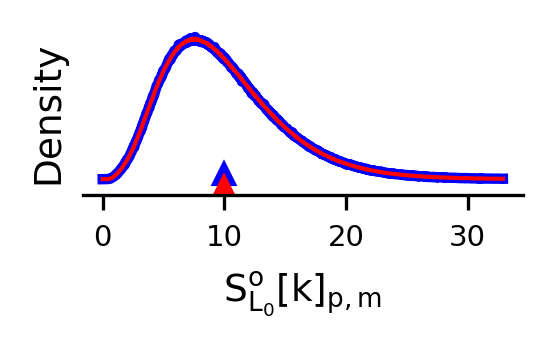

In [ ]:

markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/6 *1.23/34.62*42.75  ,figure_width1/1.7/54*49/2 / 28.5327  * 22 )




# save_model_iterations =  [0,1,2,3,10,11,59,60,61,1199,1200,1201,1230, 1259,1260,1261 ,1499,1500 ,2000,1999 , 5000 , 5001, 5030 , 5002, 5060 , 5061 , 5062]


iteration_k=800
o=1


rep=0

method = "FA"
str_dir_data_BASE = base_directory_data_str + method + "(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 


str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
net_k1260 = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)
net_k1260.load_model(str_direction)



str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"

net_k1259 = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)
net_k1259.load_model(str_direction)


iteration_k=3
o=1


str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"




net_k3 = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)
net_k3.load_model(str_direction)


str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"



net_k2 = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)
net_k2.load_model(str_direction)






str_direction = str_dir_data_BASE + "code_map_"  +  str(rep) +  ".txt"

with open( str_direction , "rb") as fp:   #Pickling
  code_map = pickle.load(fp)







device0 = code_map[0].device


batch_size=1000
n_data = 10000

train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device0  , code_map = code_map
                                                                                    , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True)


train_dataset = train_loader.dataset
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]


my_coding.device = device0
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]
train_tensor = train_dataset.tensors[0].to(device0)  [0:n_data]

targets_tensor = targets_tensor[ torch.randperm(targets_tensor.shape[0])]


L_f_k1260 = net_k1260.forward(train_tensor)
L_f_k1259 = net_k1259.forward(train_tensor)




# E_k1260 = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k1260
# E_k1259 = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k1259

# Delta_fa , Delta_bias_fa = net_k1260.BP_TRW(E_k1260) ########################################################################################## FA
# Delta_fa , Delta_bias_fa = net_k1259.BP_TRW(E_k1259) ########################################################################################## FA





L_f_k3  = net_k3 .forward(train_tensor)
L_f_k2  = net_k2 .forward(train_tensor)




# E_k3  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k3 
# E_k2  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k2 

# Delta_fa , Delta_bias_fa = net_k3 .BP_TRW(E_k3 ) ########################################################################################## FA
# Delta_fa , Delta_bias_fa = net_k2 .BP_TRW(E_k2 ) ########################################################################################## FA






for l in range(0,1):
  print(l)


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  output_layer_tensor_k3  =  net_k3 .L[l]
  output_layer_tensor_k2   = net_k2 .L[l]

  


  if l==0: 
    bins_between = np.arange(  0, 33 , 0.05)
    bins_within = np.arange(  0 , 33 , 0.05)

  if l==1: 
    bins_between = np.arange(  0, 6 , 0.01)
    bins_within = np.arange(  0 , 7 , 0.01)

  if l==2: 
    bins_between = np.arange(   0.3, 2.5 , 0.01)
    bins_within = np.arange(   0.3 , 3 , 0.01)

  if l==3: 
    bins_between = np.arange(  0.33 , 0.8, 0.01)
    bins_within = np.arange(  0.33 ,0.9 , 0.01)



  # step = 0.1
  # if l == 3 : step = 0.01 
  # bins_between , bins_within   =  find_bins_for_autocorr_hist( layer_tensor1 = output_layer_tensor_k2 , layer_tensor2 = output_layer_tensor_k3
  #                                                             , targets_tensor1=targets_tensor , targets_tensor2  =targets_tensor , step = step)


  hist_within , within_class_mean  ,  hist_between , between_class_mean , within_class_num , between_class_num  = similarity_histogram( layer_tensor1 = output_layer_tensor_k2  , layer_tensor2 = output_layer_tensor_k3
                                                           , targets_tensor1 = targets_tensor , targets_tensor2 = targets_tensor 
                                                           , bins_between = bins_between , bins_within = bins_within)

  
  
  # #  within_class_mean is actully more than between_class_mean and we just shift within_class_mean just for illustrative reasons
  # if l == 3 :
  #   hist_within = hist_within*5
  #   hist_between = hist_between*5

  #   within_class_mean+=0.02
  #   bins_within+=0.02
  #   # within_class_mean+=0.1




  

  

  plt.plot(  bins_within[0:-1] ,  hist_within*10, color= lighten_color('#0000FF', amount=1) , linewidth=2.5  , alpha=1)

  plt.plot(  bins_between[0:-1] ,  hist_between *10 ,color= lighten_color('#FF0000', amount=1) , linewidth=1 , alpha=1 )
  # plt.vlines(x=0 , ymin=0 , ymax = hist_between_L.max()*1.02)

  plt.xlabel(r"$ S^o_{L_{0}}[k]_{p,m}  $", fontsize= plt_fontsize_title_)
  plt.ylabel(r"Density", fontsize= plt_fontsize_title_)
  max0 = hist_within.max()/7
          

  plt.plot(  within_class_mean  ,  [-max0*0.5+0.002] , '^' , color='blue' , markersize = 5 )
  plt.plot( within_class_mean ,  [-max0-0.002] , '^' , color='red' , markersize = 5 )

  print(within_class_mean,between_class_mean)
  #############################################################################################################################################################################



  # output_layer_tensor_k1260  =  net_k1260 .L[l]
  # output_layer_tensor_k1259   = net_k1259 .L[l]



  # bins_between , bins_within   =  find_bins_for_autocorr_hist( layer_tensor1 = output_layer_tensor_k1259 , layer_tensor2 = output_layer_tensor_k1260
  #                                                             , targets_tensor1=targets_tensor , targets_tensor2  =targets_tensor , step = 0.1 )


  # hist_within , within_class_mean  ,  hist_between , between_class_mean   = autocorrelation_histogram( layer_tensor1 = output_layer_tensor_k1259  , layer_tensor2 = output_layer_tensor_k1260 
  #                                                          , targets_tensor1 = targets_tensor , targets_tensor2 = targets_tensor 
  #                                                          , bins_between = bins_between , bins_within = bins_within)

  
  
  
  # if l!=0:
  #   # if l==5: 
  #   #   hist_within = hist_within*0.3
  #   #   hist_between = hist_between*0.3

  #   plt.plot(  bins_within[0:-1] ,  hist_within  , color= lighten_color('#0000FF', amount=0.5)  , linewidth=1.8)

  #   plt.plot(  bins_between[0:-1] ,  hist_between  , color=lighten_color('#FF0000', amount=0.5) , linewidth=1.2)
  #   # plt.vlines(x=0 , ymin=0 , ymax = hist_between_L.max()*1.02)

  #   plt.xlabel(r"$ S^o_{L_{\ell-1}}[k]_{p,m}  $", fontsize= plt_fontsize_title_)
  #   plt.ylabel(r"Density", fontsize= plt_fontsize_title_)
    
            


    


  
  #   plt.plot(  within_class_mean  ,  [-max0] , 'v' ,markeredgecolor = lighten_color('#0000FF', amount=0.5) ,  markerfacecolor = lighten_color('#0000FF', amount=0.5) , markersize = 3.5 )
  #   plt.plot( between_class_mean ,  [-max0] , 'v' ,markeredgecolor = lighten_color('#FF0000', amount=0.5), markerfacecolor = lighten_color('#FF0000', amount=0.5) , markersize = 3.5 )


  #############################################################################################################################################################################
  


  print(within_class_mean,between_class_mean)

  # plt.title(r'$\ell=$' + str(l+1) , fontsize= plt_fontsize_title_   )

  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  # ax.yaxis.set_ticks_position('none')
  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  # ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.yticks([] )
  # plt.yticks([0,0.05] )


  # if l==0: plt.xlim([0,35])
  # if l==1: plt.xlim([0,11])
  # if l==2: plt.xlim([0,6])
  # if l==3: plt.xlim([0 , 5])


  plt.savefig( base_directory_figure_str + '/hist_L_initial_phase_TARGET_SHUFFLE' + str(l+1) + '.jpg' 
              , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001  ) 


  plt.show()
  








In [ ]:
# plot legend


markersize_ = 1
linewidth_ = 3
plt.figure(num = None, figsize=(figure_width1,figure_width1) , dpi=300, facecolor='w', edgecolor='k')

 
plt.plot(  [0]   , label = r"Within categories" , color =  lighten_color('#0000FF', amount=1)   , linewidth = linewidth_ 
          , markeredgewidth=1, markeredgecolor= 'k' , alpha=1)   
# plt.plot(  [0]  , '-'  , label = r"$B^T_{\ell} \measuredangle \sum_{k'=0}^{k} T^{60}_{\ell,aln}[k']    $" , color = my_cycle[1] , linewidth = linewidth_ )   

plt.plot(  [0]    , label = r"Between categories" , color =  lighten_color('#FF0000', amount=1)  , linewidth = linewidth_ 
          , markeredgewidth=1 , markeredgecolor= 'k' , alpha=1 )  



# plt.plot(  [0]  , label = r"Within category, k=1260, $o=1$" , color =  lighten_color('#0000FF', amount=1)   , linewidth = linewidth_ 
#           , markeredgewidth=1, markeredgecolor= 'k' , alpha=0.5 )   
# # plt.plot(  [0]  , '-'  , label = r"$B^T_{\ell} \measuredangle \sum_{k'=0}^{k} T^{60}_{\ell,aln}[k']    $" , color = my_cycle[1] , linewidth = linewidth_ )   

# plt.plot(  [0]   , label = r"Between category, k=1260, $o=1$" , color =  lighten_color('#FF0000', amount=1)  , linewidth = linewidth_ 
#           , markeredgewidth=1 , markeredgecolor= 'k' , alpha=0.5)  
# # plt.plot(  [0]   , '-'  , label = r"$B^T_{\ell} \measuredangle \sum T^1_{\ell,aln}   $"  , color = my_cycle[2] , linewidth = linewidth_  )  


# # plt.plot(  [0]   , 'o' , marker = 'o' , label = r"$B^T_{\ell} \measuredangle \Delta W_{\ell,FA}[k]  $"  , color = 'k' , linewidth = linewidth_  )  
# # plt.plot(  [0]   , '-'  , label = r"$B^T_{\ell} \measuredangle W_{\ell}[k] $"  , color = 'k', linewidth = linewidth_  )  





leg =  plt.legend(  fontsize = 9  , labelspacing = 0.4 , markerscale= markersize_ ,ncol=1 , columnspacing = 2 )

for line in leg.get_lines():
    line.set_linewidth(linewidth_)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

# plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,108)
# plt.xlim(-100 ,10000)
# plt.yticks([10,30 ,50 ,70 ,90])

plt.axis('off')


def export_legend(legend, filename  , expand=[ -4 ,-4 ,4,4]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + '/initial_phase_legend3.jpg' )



plt.show()

# Plot early phase  (article figures)

1


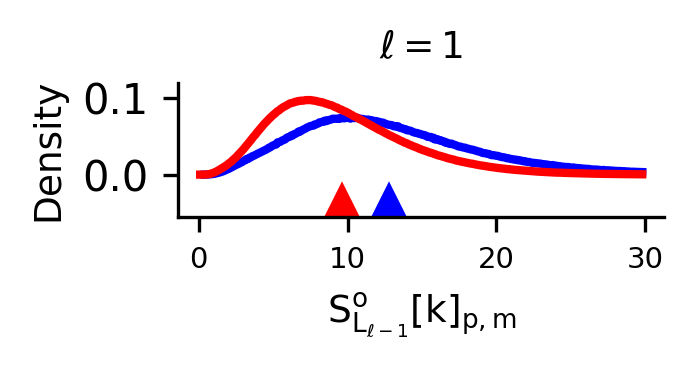

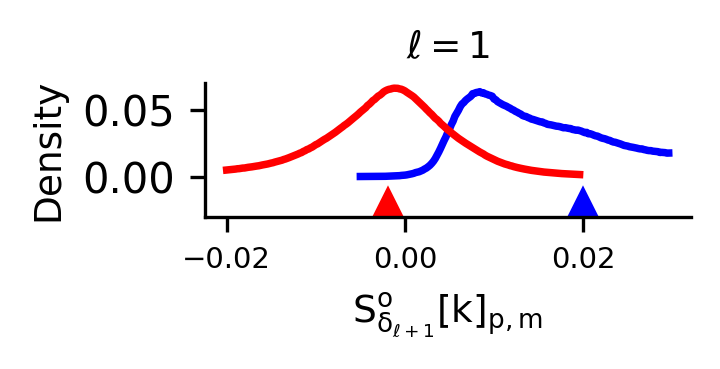

2


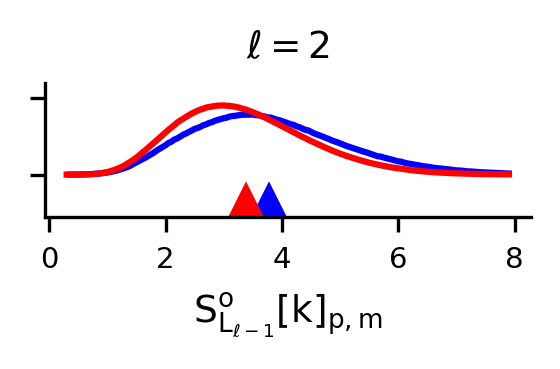

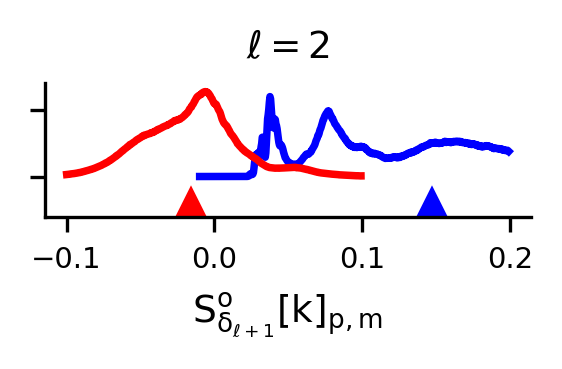

3


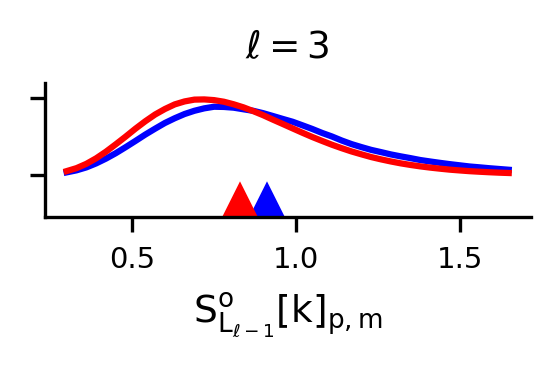

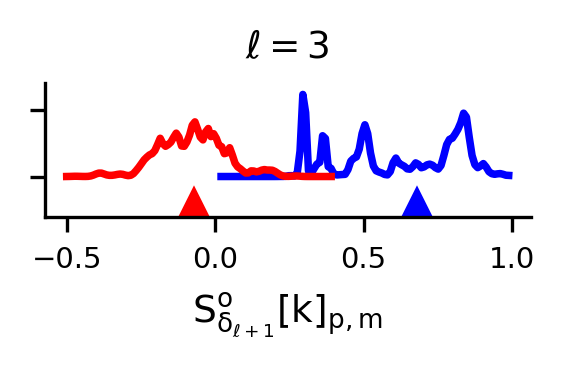

4


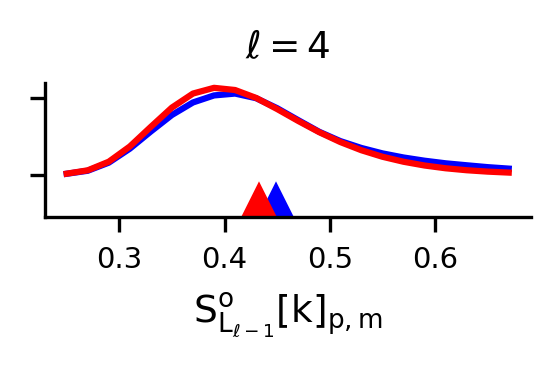

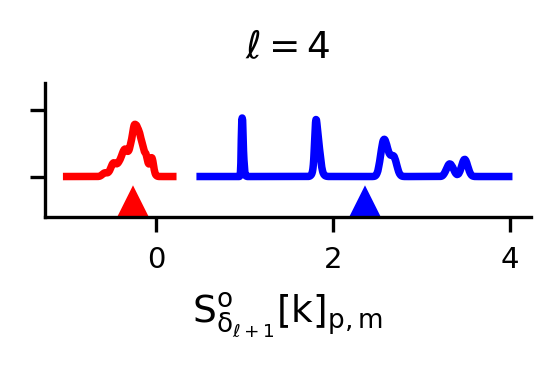

In [ ]:

markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7

figsize_ = ( figure_width2/3.9*190/168/195*188  ,figure_width1/6)



# save_model_iterations =  [0,1,2,3,10,11,59,60,61,1199,1200,1201,1230, 1259,1260,1261 ,1499,1500 ,2000,1999 , 5000 , 5001, 5030 , 5002, 5060 , 5061 , 5062]





method = "FA"
str_dir_data_BASE = base_directory_data_str + method + "(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 




iteration_k=3
o=1
rep = 0



net_k = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)



str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
net_k.load_model(str_direction)



net_kmo = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)

iteration_kmo = iteration_k - o

str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_kmo) +  "_" + str(rep) + "_.txt"
net_kmo.load_model(str_direction)



str_direction = str_dir_data_BASE + "code_map_"  +  str(rep) +  ".txt"

with open( str_direction , "rb") as fp:   #Pickling
  code_map = pickle.load(fp)







device0 = code_map[0].device


batch_size=1000
n_data = 8000

train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device0  , code_map = code_map
                                                                                    , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True)


train_dataset = train_loader.dataset
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]


my_coding.device = device0
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]
train_tensor = train_dataset.tensors[0].to(device0)  [0:n_data]




L_f_k = net_k.forward(train_tensor)
L_f_kmo = net_kmo.forward(train_tensor)






E_k  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k 
E_kmo  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_kmo

Delta_fa , Delta_bias_fa = net_k .BP_TRW(E_k ) ########################################################################################## FA
Delta_fa , Delta_bias_fa = net_kmo .BP_TRW(E_kmo ) ########################################################################################## FA






for l in range(1,5):
  print(l)
  ################ Plot L


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  output_layer_tensor_k  =  net_k .L[l-1]
  output_layer_tensor_kmo   = net_kmo .L[l-1]

  



  if l==1: 
    bins_between = np.arange(  0, 30 , 0.1)
    bins_within = np.arange(  0 , 30 , 0.1)

  if l==2: 
    bins_between = np.arange(  0, 8 , 0.05)
    bins_within = np.arange(  0 , 8 , 0.05)

  if l==3: 
    bins_between = np.arange(   0.3 , 1.7 , 0.03)
    bins_within = np.arange(   0.3 , 1.7 , 0.03)

  if l==4: 
    bins_between = np.arange(  0.25 , 0.7, 0.02)
    bins_within = np.arange(  0.25 , 0.7 , 0.02)





  hist_within , within_class_mean0  ,  hist_between , between_class_mean0 , within_class_num , between_class_num  = similarity_histogram( layer_tensor1 = output_layer_tensor_k
                                                                                                                                            , layer_tensor2 = output_layer_tensor_kmo
                                                           , targets_tensor1 = targets_tensor , targets_tensor2 = targets_tensor 
                                                           , bins_between = bins_between , bins_within = bins_within)

  
  


  
  # hist_within = hist_within/hist_within.max() 
  # hist_between = hist_between/hist_between.max()

  hist_within[ hist_within<=0.000000001 ] = float('nan')
  hist_between[ hist_between<=0.000000001 ] = float('nan')
  
  if l==1:
    linewidth0_ = 2
  else:
    linewidth0_ = 1.5



  if l==1: hist_within = hist_within*10
  if l==1: hist_between = hist_between*10


  if l==2: hist_within = hist_within*5
  if l==2: hist_between = hist_between*5


  if l==3: hist_within = hist_within*2
  if l==3: hist_between = hist_between*2


  plt.plot(  bins_within[0:-1] ,  hist_within, color= lighten_color('#0000FF', amount=1) , linewidth= linewidth0_  , alpha=1)

  plt.plot(  bins_between[0:-1] ,  hist_between  ,color= lighten_color('#FF0000', amount=1) , linewidth=linewidth0_ , alpha=1 )


  plt.xlabel(r"$ S^o_{L_{\ell-1}}[k]_{p,m}  $", fontsize= plt_fontsize_title_)
  if l==1: plt.ylabel(r"Density", fontsize= plt_fontsize_title_)

  # max0 = hist_within.max()/7
  plt.ylim([-.055 , 0.12])    

  ax = plt.gca()       

  ymin, ymax = ax.get_ylim()

  ymin = ymin - (ymax - ymin)/5 

  plt.plot(  within_class_mean0  ,  [-.05] , '^' , color='blue' , markersize = 13 )
  plt.plot( between_class_mean0 ,  [-.05] , '^' , color='red' , markersize = 13 )



 
  plt.title(r'$\ell=$' + str(l) , fontsize= plt_fontsize_title_   )

  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  # if l!=1:  ax.spines['left'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  # ax.yaxis.set_ticks_position('none')
  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  # ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  # if l!=1: plt.yticks([])

  # if l==0: plt.xlim([0,35])
  # if l==1: plt.xlim([0,11])
  # if l==2: plt.xlim([0,6])
  # if l==3: plt.xlim([0 , 5])

  if l!=1:  ax.set_yticklabels([])
  
  plt.savefig( base_directory_figure_str + '/hist_L_initial_phase_l' + str(l) + '.jpg' 
              , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001  ) 


  plt.show()
  




  # ################################# plot legend


  # plt.figure(num = None, figsize=(figure_width1/3,figure_width1/3) , dpi=300, facecolor='w', edgecolor='k')


  # proportion = round(  within_class_num / (within_class_num + between_class_num) *100  )

  # plt.plot(  [0] ,  [0]  , color= lighten_color('#0000FF', amount=1) , linewidth=1.5  , alpha=1 , label = str( proportion ) + "%" )

  # proportion = round(  between_class_num / (within_class_num + between_class_num) *100 )

  # plt.plot(  [0]  ,  [0]   ,color= lighten_color('#FF0000', amount=1) , linewidth=1.5 , alpha=1 , label = str( proportion ) + "%" )
  # # plt.vlines(x=0 , ymin=0 , ymax = hist_between_L.max()*1.02)

  # print( 'within_class_num + between_class_num ' )

  # print(  within_class_num +  between_class_num  )


  # leg =  plt.legend(  fontsize = 9  , labelspacing = 0.4 , markerscale= markersize_ ,ncol=2 , columnspacing = 1 , title = "Proportion of samples:")

  # for line in leg.get_lines():
  #     line.set_linewidth(2)

  # for lh in leg.legendHandles: 
  #     lh._legmarker.set_alpha(1)


  # # plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
  # ax = plt.gca()
  # ax.spines['right'].set_color('none')
  # ax.spines['top'].set_color('none')
  # ax.xaxis.set_ticks_position('bottom')
  # ax.yaxis.set_ticks_position('left')
  # ax.tick_params(axis='x', labelsize=7)
  # ax.tick_params(axis='y', labelsize=7)

  # # plt.ylim([-.01 , 0.03])

  # # plt.ylim(0,108)
  # # plt.xlim(-100 ,10000)
  # # plt.yticks([10,30 ,50 ,70 ,90])

  # plt.axis('off')


  # def export_legend(legend, filename  , expand=[ -4 ,-4 ,4,4]):
  #     fig  = legend.figure
  #     fig.canvas.draw()
  #     bbox  = legend.get_window_extent()
  #     bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
  #     bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
  #     fig.savefig(filename, dpi=300, bbox_inches=bbox)


  # export_legend(leg  , filename= base_directory_figure_str + '/legend_hist_initial_phase' + str(l+1) + '.jpg' )



  # plt.show()


  ####################################### Plot delta



  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')
  
  error_layer_tensor_k  =  net_k .delta_FA[l+1]
  error_layer_tensor_kmo   = net_kmo .delta_FA[l+1]




  if l==1: 
    bins_between = np.arange(  -0.02 , 0.02, 0.0002)
    bins_within  =  np.arange(  -0.005 , 0.03, 0.0002)

  if l==2: 
    bins_between = np.arange(  -.1 , .1, 0.0004)
    bins_within  = np.arange(  -.01 , .2, 0.0004)

  if l==3: 
    bins_between = np.arange(  -.5 , 0.4 , 0.009)
    bins_within  = np.arange(  0.02 , 1, 0.0095)

  if l==4: 
    bins_between = np.arange(  -1.01 , 0.2, 0.005)
    bins_within  = np.arange(  0.5 , 4, 0.005)




  hist_within , within_class_mean0  ,  hist_between , between_class_mean0 , within_class_num , between_class_num   = similarity_histogram( layer_tensor1 = error_layer_tensor_k
                                                                                                                                             , layer_tensor2 = error_layer_tensor_kmo
                                                           , targets_tensor1 = targets_tensor , targets_tensor2 = targets_tensor 
                                                           , bins_between = bins_between , bins_within = bins_within)

  
  
  
  # hist_within = hist_within/hist_within.max() 
  # hist_between = hist_between/hist_between.max()

  # hist_within[ hist_within<=0.0001 ] = float('nan')
  # hist_between[ hist_between<=0.0001 ] = float('nan')


  # hist_within[  hist_within <0.0001 ] = float('nan')
  # hist_between[  hist_between <0.001 ] = float('nan')

  
  # if l==5: 
  #   hist_within = hist_within*0.3
  #   hist_between = hist_between*0.3

  if l==1: hist_within = hist_within*5
  if l==1: hist_between = hist_between*5


  if l==2: hist_within = hist_within*10
  if l==2: hist_between = hist_between*10


  if l==3: hist_within = hist_within
  if l==3: hist_between = hist_between


  if l==4: hist_within = hist_within*2
  if l==4: hist_between = hist_between*2



  plt.plot(  bins_within[0:-1] , hist_within  , color='blue' , linewidth=1.8)

  plt.plot(  bins_between[0:-1] ,  hist_between  , color='red' , linewidth=1.8)
  # plt.vlines(x=0 , ymin=0 , ymax = hist_between_L.max()*1.02)

  plt.xlabel(r"$ S^o_{\delta_{\ell+1}}[k]_{p,m}  $", fontsize= plt_fontsize_title_)
  if l==1: plt.ylabel(r"Density", fontsize= plt_fontsize_title_)


          
  ax = plt.gca()       

  # ymin, ymax = ax.get_ylim()

  # ymin = ymin - (ymax - ymin)/4



  
 


          
  ax = plt.gca()       

  ymin, ymax = ax.get_ylim()

  ymin = ymin - (ymax - ymin)/3

  plt.ylim([-.03 , 0.07])    

  plt.plot(  within_class_mean0  ,  [-.03] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=1) ,  markerfacecolor = lighten_color('#0000FF', amount=1) , markersize = 13 )
  plt.plot( between_class_mean0 ,  [-.03] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=1), markerfacecolor = lighten_color('#FF0000', amount=1) , markersize = 13 )



  # print(within_class_mean0,between_class_mean0)

  plt.title(r'$\ell=$' + str(l) , fontsize= plt_fontsize_title_   )
  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  # if l!=1:  ax.spines['left'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  # ax.yaxis.set_ticks_position('none')
  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  # ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  # if l!=1:  plt.yticks([])

  # plt.ylim([-0.01,0.03])
  # if l==2: plt.xlim([-0.03,0.05])
  # if l==3: plt.xlim([-0.15,0.25])
  # if l==4: plt.xlim([-0.6,1])
  # # if l==5: plt.xlim([-1 , 2])
  
  # plt.yticks([0,0.03 , 0.06])

  # if l!=1: plt.yticks([])
  if l!=1:  ax.set_yticklabels([])

  plt.savefig( base_directory_figure_str + 'hist_delta_initial_phase_l' + str(l) + '.jpg' 
              , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001  ) 


  plt.show()
  



# function: similarity_hist_less_more_th_error



In [ ]:


def similarity_hist_less_more_th_error(  categories_kmo , categories_k ,   delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k 
                                 , bins_between_delta , bins_within_delta 
                                 , bins_between_L , bins_within_L ,   
                                 threshold_delta_within ,  threshold_delta_between  ):
  





  autocorrelation_delta = torch.matmul ( delta_lp1_kmo , delta_lp1_k.t()  )
  autocorrelation_L = torch.matmul ( L_lm1_kmo , L_lm1_k.t()  )



  hist_between_delta_pos_num = 0
  hist_between_delta_neg_num = 0


  hist_between_L_pos_num = 0
  hist_between_L_neg_num = 0





  hist_between_delta_pos_sum= 0
  hist_between_delta_neg_sum = 0

  hist_between_L_pos_sum = 0
  hist_between_L_neg_sum = 0



  First_time_flag = False



  for digit1 in range(10):
    for digit2 in range(digit1+1,10):
      # print(digit1  , digit2 )


      

        delta_lp1_kmo_digit0 = delta_lp1_kmo [categories_kmo==digit1,:]
        delta_lp1_k_digit1 = delta_lp1_k [categories_k==digit2,:]



        L_lm1_kmo_digit0 = L_lm1_kmo [categories_kmo==digit1,:]
        L_lm1_k_digit1 = L_lm1_k [categories_k==digit2,:]



        between_class_autocorrelation_delta  = torch.matmul(    delta_lp1_kmo_digit0  ,  delta_lp1_k_digit1.t() )
        between_class_autocorrelation_L  = torch.matmul(    L_lm1_kmo_digit0  ,  L_lm1_k_digit1.t() )





        between_class_autocorrelation_L_pos = between_class_autocorrelation_L[between_class_autocorrelation_delta> threshold_delta_between].flatten()
        between_class_autocorrelation_L_neg = between_class_autocorrelation_L[between_class_autocorrelation_delta<= threshold_delta_between].flatten()


        between_class_autocorrelation_delta_pos  = between_class_autocorrelation_delta[between_class_autocorrelation_delta> threshold_delta_between].flatten()
        between_class_autocorrelation_delta_neg  = between_class_autocorrelation_delta[between_class_autocorrelation_delta<= threshold_delta_between].flatten()




        hist_between_delta_pos_sum += between_class_autocorrelation_delta_pos.sum().to('cpu')
        hist_between_delta_neg_sum += between_class_autocorrelation_delta_neg.sum().to('cpu')


        hist_between_L_pos_sum += between_class_autocorrelation_L_pos.sum().to('cpu')
        hist_between_L_neg_sum += between_class_autocorrelation_L_neg.sum().to('cpu')





        hist_between_delta_pos_num += between_class_autocorrelation_delta_pos.shape[0]
        hist_between_delta_neg_num += between_class_autocorrelation_delta_neg.shape[0]


        hist_between_L_pos_num += between_class_autocorrelation_L_pos.shape[0]
        hist_between_L_neg_num += between_class_autocorrelation_L_neg.shape[0]







        if First_time_flag == False   :
          hist_between_delta_pos , bins = np.histogram( between_class_autocorrelation_delta_pos  .to('cpu').numpy() , bins = bins_between_delta )
          
        else:
          hist0 , bins0 = np.histogram(between_class_autocorrelation_delta_pos  .to('cpu').numpy() , bins = bins_between_delta )
          hist_between_delta_pos += hist0
      




        if First_time_flag == False   :
          hist_between_delta_neg , bins = np.histogram(  between_class_autocorrelation_delta_neg .to('cpu').numpy() , bins = bins_between_delta )
       
        else:
          hist0 , bins0 = np.histogram(between_class_autocorrelation_delta_neg  .to('cpu').numpy() , bins = bins_between_delta )
          hist_between_delta_neg += hist0
      



        if First_time_flag == False   :
          hist_between_L_pos , bins = np.histogram( between_class_autocorrelation_L_pos  .to('cpu').numpy() , bins = bins_between_L )
          
        else:
          hist0 , bins0 = np.histogram(between_class_autocorrelation_L_pos  .to('cpu').numpy() , bins = bins_between_L )
          hist_between_L_pos += hist0
      




        if First_time_flag == False   :
          hist_between_L_neg , bins = np.histogram(  between_class_autocorrelation_L_neg .to('cpu').numpy() , bins = bins_between_L )
          First_time_flag =True
        else:
          hist0 , bins0 = np.histogram(between_class_autocorrelation_L_neg  .to('cpu').numpy() , bins = bins_between_L )
          hist_between_L_neg += hist0
      




  hist_within_delta_pos_num = 0
  hist_within_delta_neg_num = 0


  hist_within_L_pos_num = 0
  hist_within_L_neg_num = 0




  hist_within_delta_pos_sum = 0
  hist_within_delta_neg_sum = 0

  hist_within_L_pos_sum = 0
  hist_within_L_neg_sum = 0




  First_time_flag = False




  for digit1 in range(10):




        delta_lp1_kmo_digit0 = delta_lp1_kmo [categories_kmo==digit1,:]
        delta_lp1_k_digit1 = delta_lp1_k [categories_k==digit1,:]



        L_lm1_kmo_digit0 = L_lm1_kmo [categories_kmo==digit1,:]
        L_lm1_k_digit1 = L_lm1_k [categories_k==digit1,:]



        within_class_autocorrelation_delta  = torch.matmul(    delta_lp1_kmo_digit0  ,  delta_lp1_k_digit1.t() )
        within_class_autocorrelation_L  = torch.matmul(    L_lm1_kmo_digit0  ,  L_lm1_k_digit1.t() )





        within_class_autocorrelation_L_pos = within_class_autocorrelation_L[within_class_autocorrelation_delta> threshold_delta_within].flatten()
        within_class_autocorrelation_L_neg = within_class_autocorrelation_L[within_class_autocorrelation_delta<= threshold_delta_within ].flatten()


        within_class_autocorrelation_delta_pos  = within_class_autocorrelation_delta[within_class_autocorrelation_delta> threshold_delta_within].flatten()
        within_class_autocorrelation_delta_neg  = within_class_autocorrelation_delta[within_class_autocorrelation_delta<= threshold_delta_within].flatten()




        hist_within_delta_pos_sum += within_class_autocorrelation_delta_pos.sum().to('cpu')
        hist_within_delta_neg_sum += within_class_autocorrelation_delta_neg.sum().to('cpu')


        hist_within_L_pos_sum += within_class_autocorrelation_L_pos.sum().to('cpu')
        hist_within_L_neg_sum += within_class_autocorrelation_L_neg.sum().to('cpu')





        hist_within_delta_pos_num += within_class_autocorrelation_delta_pos.shape[0]
        hist_within_delta_neg_num += within_class_autocorrelation_delta_neg.shape[0]


        hist_within_L_pos_num += within_class_autocorrelation_L_pos.shape[0]
        hist_within_L_neg_num += within_class_autocorrelation_L_neg.shape[0]







        if First_time_flag == False   :
          hist_within_delta_pos , bins = np.histogram( within_class_autocorrelation_delta_pos  .to('cpu').numpy() , bins = bins_within_delta )
         
        else:
          hist0 , bins0 = np.histogram(within_class_autocorrelation_delta_pos  .to('cpu').numpy() , bins = bins_within_delta )
          hist_within_delta_pos += hist0
      




        if First_time_flag == False   :
          hist_within_delta_neg , bins = np.histogram(  within_class_autocorrelation_delta_neg .to('cpu').numpy() , bins = bins_within_delta )
         
        else:
          hist0 , bins0 = np.histogram(within_class_autocorrelation_delta_neg  .to('cpu').numpy() , bins = bins_within_delta )
          hist_within_delta_neg += hist0
      



        if First_time_flag == False   :
          hist_within_L_pos , bins = np.histogram( within_class_autocorrelation_L_pos  .to('cpu').numpy() , bins = bins_within_L )
       
        else:
          hist0 , bins0 = np.histogram(within_class_autocorrelation_L_pos  .to('cpu').numpy() , bins = bins_within_L )
          hist_within_L_pos += hist0
      




        if First_time_flag == False   :
          hist_within_L_neg , bins = np.histogram(  within_class_autocorrelation_L_neg .to('cpu').numpy() , bins = bins_within_L )
          First_time_flag =  True
         
        else:
          hist0 , bins0 = np.histogram(within_class_autocorrelation_L_neg  .to('cpu').numpy() , bins = bins_within_L )
          hist_within_L_neg += hist0
      






  hist_within_delta_pos_mean = hist_within_delta_pos_sum / hist_within_delta_pos_num
  hist_within_delta_neg_mean = hist_within_delta_neg_sum / hist_within_delta_neg_num

  hist_within_L_pos_mean = hist_within_L_pos_sum / hist_within_L_pos_num
  hist_within_L_neg_mean = hist_within_L_neg_sum / hist_within_L_neg_num



  hist_between_delta_pos_mean = hist_between_delta_pos_sum / hist_between_delta_pos_num
  hist_between_delta_neg_mean = hist_between_delta_neg_sum / hist_between_delta_neg_num

  hist_between_L_pos_mean = hist_between_L_pos_sum / hist_between_L_pos_num
  hist_between_L_neg_mean = hist_between_L_neg_sum / hist_between_L_neg_num










  hist_within_delta_pos = hist_within_delta_pos / ( hist_within_delta_pos_num +  hist_within_delta_neg_num )
  hist_within_delta_neg = hist_within_delta_neg / ( hist_within_delta_pos_num +  hist_within_delta_neg_num )

  if hist_within_L_pos_num!=0:
    hist_within_L_pos = hist_within_L_pos /  hist_within_L_pos_num

  if hist_within_L_neg_num!=0:
    hist_within_L_neg = hist_within_L_neg /  hist_within_L_neg_num





  hist_between_delta_pos = hist_between_delta_pos /  ( hist_between_delta_pos_num +  hist_between_delta_neg_num )
  hist_between_delta_neg = hist_between_delta_neg /  ( hist_between_delta_pos_num +  hist_between_delta_neg_num )

  if hist_between_L_pos_num!=0:
    hist_between_L_pos = hist_between_L_pos /  hist_between_L_pos_num
    
  if hist_between_L_neg_num!=0:
    hist_between_L_neg = hist_between_L_neg /  hist_between_L_neg_num

  data_dic ={
      
    "hist_within_delta_pos" : hist_within_delta_pos ,
    "hist_within_delta_neg" : hist_within_delta_neg ,

    "hist_within_L_pos" : hist_within_L_pos ,
    "hist_within_L_neg" : hist_within_L_neg ,

    "hist_between_delta_pos" : hist_between_delta_pos ,
    "hist_between_delta_neg" : hist_between_delta_neg ,

    "hist_between_L_pos" : hist_between_L_pos ,
    "hist_between_L_neg" : hist_between_L_neg ,



    "hist_within_delta_pos_mean" : hist_within_delta_pos_mean ,
    "hist_within_delta_neg_mean" : hist_within_delta_neg_mean,

    "hist_within_L_pos_mean" : hist_within_L_pos_mean,
    "hist_within_L_neg_mean" : hist_within_L_neg_mean,



    "hist_between_delta_pos_mean" : hist_between_delta_pos_mean,
    "hist_between_delta_neg_mean" : hist_between_delta_neg_mean,

    "hist_between_L_pos_mean" : hist_between_L_pos_mean,
    "hist_between_L_neg_mean" : hist_between_L_neg_mean,



    "hist_within_delta_pos_num" : hist_within_delta_pos_num ,
    "hist_within_delta_neg_num" : hist_within_delta_neg_num,

    "hist_within_L_pos_num" : hist_within_L_pos_num,
    "hist_within_L_neg_num" : hist_within_L_neg_num,



    "hist_between_delta_pos_num" : hist_between_delta_pos_num,
    "hist_between_delta_neg_num" : hist_between_delta_neg_num,

    "hist_between_L_pos_num" : hist_between_L_pos_num,
    "hist_between_L_neg_num" : hist_between_L_neg_num


       }

  return data_dic


# function: similarity_mean 

In [ ]:



def similarity_mean( layer_tensor1 , layer_tensor2 , targets_tensor1 , targets_tensor2  ):

  between_class_sum = 0
  between_class_num = 0


  counter =0
  for digit1 in range(10):
    for digit2 in range(digit1+1,10):
 


      if digit1!= digit2:

        layer_tensor1_digit0 = layer_tensor1[targets_tensor1==digit1,:]
        layer_tensor2_digit1 = layer_tensor2[targets_tensor2==digit2,:]


        between_class_autocorrelation  = torch.matmul(    layer_tensor1_digit0  ,  layer_tensor2_digit1.t() )


        between_class_sum += between_class_autocorrelation.sum()
        between_class_num += between_class_autocorrelation.shape[0] * between_class_autocorrelation.shape[1]


      



  within_class_sum = 0
  within_class_num = 0

  counter = 0
  for digit1 in range(10):
    


      layer_tensor1_digit0 = layer_tensor1[targets_tensor1==digit1,:]
      layer_tensor2_digit1 = layer_tensor2[targets_tensor2==digit1,:]

    


      within_class_autocorrelation  = torch.matmul(    layer_tensor1_digit0  ,  layer_tensor2_digit1.t() )

      within_class_autocorrelation = within_class_autocorrelation[torch.ones_like(within_class_autocorrelation).triu(diagonal=1)==1]



      within_class_sum += within_class_autocorrelation.sum()
      within_class_num +=  within_class_autocorrelation.shape[0]



     

  within_class_mean =  (within_class_sum / within_class_num ).to('cpu')  
  between_class_mean =  (between_class_sum / between_class_num ).to('cpu')



  return within_class_mean.item()  , between_class_mean .item()


# function: similarity_histogram2

In [ ]:



def similarity_histogram2( layer_tensor1 , layer_tensor2 , targets_tensor1 , targets_tensor2 , bins_between, bins_within ):

  between_class_sum = 0
  between_class_num = 0


  counter =0
  for digit1 in range(10):
    for digit2 in range(digit1+1,10):
 


      if digit1!= digit2:

        layer_tensor1_digit0 = layer_tensor1[targets_tensor1==digit1,:]
        layer_tensor2_digit1 = layer_tensor2[targets_tensor2==digit2,:]


        between_class_autocorrelation  = torch.matmul(    layer_tensor1_digit0  ,  layer_tensor2_digit1.t() ).flatten()


        between_class_sum += between_class_autocorrelation.sum()
        between_class_num += between_class_autocorrelation.shape[0] 


        if counter == 0:
          hist , bins = np.histogram(between_class_autocorrelation .to('cpu').numpy() , bins = bins_between )
          counter += 1
        else:
          hist0 , bins0 = np.histogram(between_class_autocorrelation  .to('cpu').numpy() , bins = bins_between )
          hist += hist0
      

  hist_between = hist 




  within_class_sum = 0
  within_class_num = 0

  counter = 0
  for digit1 in range(10):
    


      layer_tensor1_digit0 = layer_tensor1[targets_tensor1==digit1,:]
      layer_tensor2_digit1 = layer_tensor2[targets_tensor2==digit1,:]

    


      within_class_autocorrelation  = torch.matmul(    layer_tensor1_digit0  ,  layer_tensor2_digit1.t() ).flatten()

      # within_class_autocorrelation = within_class_autocorrelation[torch.ones_like(within_class_autocorrelation).triu(diagonal=1)==1]



      within_class_sum += within_class_autocorrelation.sum()
      within_class_num +=  within_class_autocorrelation.shape[0]




      if counter == 0:
        hist , bins = np.histogram(within_class_autocorrelation .to('cpu').numpy()  , bins = bins_within )
      
        counter += 1
      else:
        hist0 , bins0 = np.histogram(within_class_autocorrelation  .to('cpu').numpy() , bins = bins_within  )
        hist += hist0
     


  hist_within = hist


  hist_within = hist_within 
  hist_between = hist_between 


  return hist_within   , within_class_sum,  hist_between  , between_class_sum  , within_class_num , between_class_num





# Plot late phase poor classified vs well calssified

1


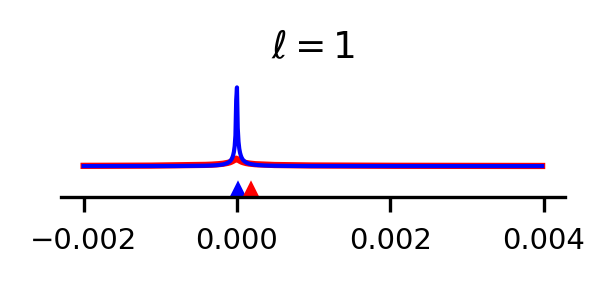

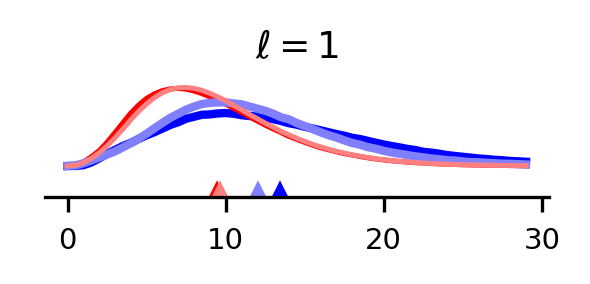

2


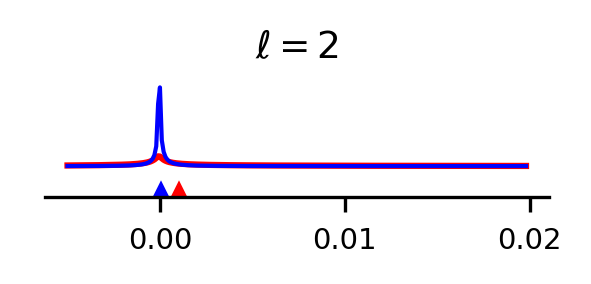

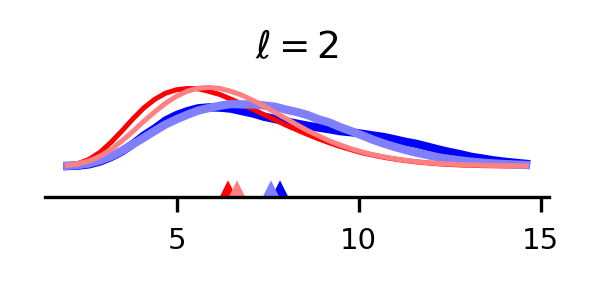

3


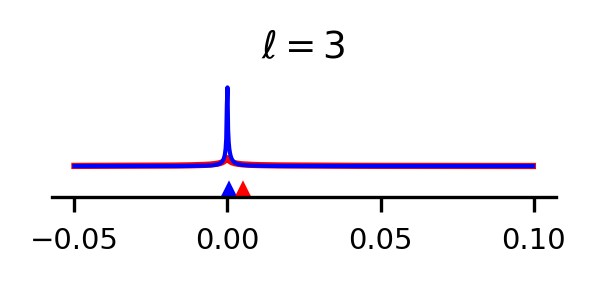

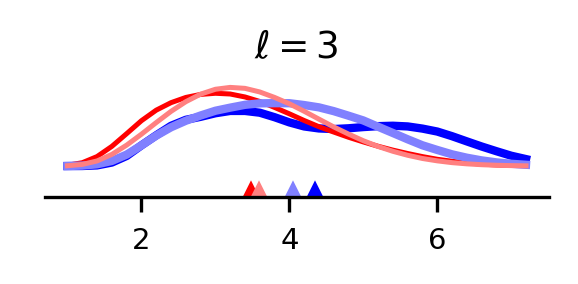

4


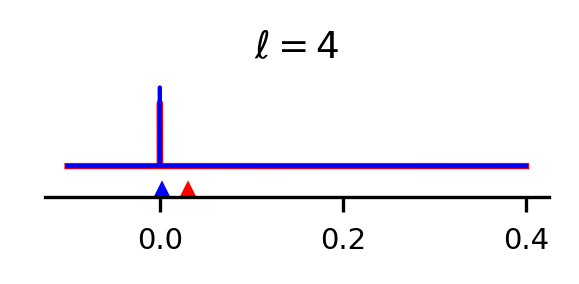

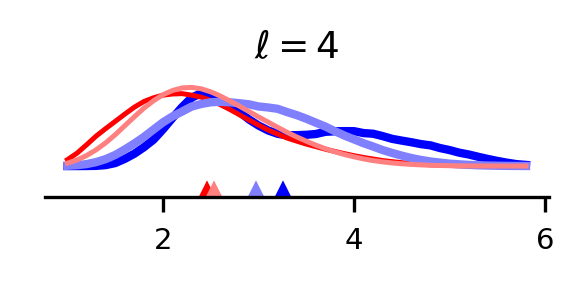

In [ ]:

markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/168,figure_width1/7)



# save_model_iterations =  [0,1,2,3,10,11,59,60,61,1199,1200,1201,1230, 1259,1260,1261 ,1499,1500 ,2000,1999 , 5000 , 5001, 5030 , 5002, 5060 , 5061 , 5062]





method = "FA"
str_dir_data_BASE = base_directory_data_str + method + "(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 




iteration_k=800
o=1
rep = 0



net_k = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)



str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
net_k.load_model(str_direction)



net_kmo = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)

iteration_kmo = iteration_k - o

str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_kmo) +  "_" + str(rep) + "_.txt"
net_kmo.load_model(str_direction)



str_direction = str_dir_data_BASE + "code_map_"  +  str(rep) +  ".txt"

with open( str_direction , "rb") as fp:   #Pickling
  code_map = pickle.load(fp)







device0 = code_map[0].device


batch_size=1000
n_data = 1000*6
n_well_classified_data = 600*6
n_poor_classified_data = n_data - n_well_classified_data



train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device0  , code_map = code_map
                                                                                    , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True)


train_dataset = train_loader.dataset
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]


my_coding.device = device0
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]
train_tensor = train_dataset.tensors[0].to(device0)  [0:n_data]




L_f_k = net_k.forward(train_tensor)
L_f_kmo = net_kmo.forward(train_tensor)






E_k  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k 
E_kmo  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_kmo

Delta_fa , Delta_bias_fa = net_k .BP_TRW(E_k ) ########################################################################################## FA
Delta_fa , Delta_bias_fa = net_kmo .BP_TRW(E_kmo ) ########################################################################################## FA




sorted_data , sorted_indices_k  =  torch.sort(    net_k . delta_FA[-1].norm(dim=1) )
sorted_data , sorted_indices_kmo  =  torch.sort(    net_kmo . delta_FA[-1].norm(dim=1))


all_data_k = train_tensor
well_classified_data_k   =  train_tensor[ sorted_indices_k[:n_well_classified_data]  ]
poor_classified_data_k = train_tensor[ sorted_indices_k[  n_well_classified_data  :  ]  ]

all_target_k = targets_tensor
well_classified_target_k   =   targets_tensor[ sorted_indices_k[:n_well_classified_data]  ]
poor_classified_target_k = targets_tensor[ sorted_indices_k[ n_well_classified_data : ]  ]


all_data_kmo = train_tensor
well_classified_data_kmo   =   train_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
poor_classified_data_kmo =   train_tensor[ sorted_indices_kmo[  n_well_classified_data  :  ]  ]

all_target_kmo = targets_tensor
well_classified_target_kmo   =     targets_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
poor_classified_target_kmo = targets_tensor[ sorted_indices_kmo[ n_well_classified_data : ]  ]





for l in range(1,5):
  print(l)
  
  delta_lp1_k  =  net_k .delta_FA[l+1]
  delta_lp1_kmo   = net_kmo .delta_FA[l+1]



  if l==1: 
    bins_between_delta = np.arange(  -0.002 ,  0.004, 0.00001)
    bins_within_delta = np.arange(  -0.002 , 0.004, 0.00001)


  if l==2: 
    bins_between_delta = np.arange(  -.005 , .02, 0.0001)
    bins_within_delta = np.arange(  -.005 , .02, 0.0001)


  if l==3: 
    bins_between_delta = np.arange(  -.05 , .1 , 0.0002)
    bins_within_delta = np.arange(  -.05 , .1, 0.0002)

  if l==4: 
    bins_between_delta = np.arange(  -.101 , .4, 0.0001)
    bins_within_delta = np.arange(  -.101 , .4, 0.0001)


  hist_within_well  , within_class_sum_well ,  hist_between_well  , between_class_sum_well  , within_class_num_well , between_class_num_well = similarity_histogram2( layer_tensor1 = delta_lp1_k[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , layer_tensor2 = delta_lp1_kmo[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , bins_between = bins_between_delta
                                                                                                                                    , bins_within = bins_within_delta )
  


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  # hist_within_well = hist_within_well / within_class_num_well
  # hist_between_well = hist_between_well / between_class_num_well

  hist_well = ( hist_within_well + hist_between_well  )  /  (within_class_num_well + between_class_num_well)

  mean_well = ( within_class_sum_well + between_class_sum_well  )  /  (within_class_num_well + between_class_num_well)


  # within_class_mean_well  = within_class_sum_well /  within_class_num_well
  # between_class_mean_well  = between_class_sum_well /  between_class_num_well


  # hist_within_well = hist_within_well/hist_within_well.max()
  # hist_between_well = hist_between_well/hist_between_well.max()


  # hist_within_well[hist_within_well < 0.00001] =  float('nan')
  # hist_between_well[ hist_between_well < 0.00001] =  float('nan')

  plt.plot(  bins_within_delta[0:-1] ,  hist_well , color= lighten_color('#0000FF', amount=1) , linewidth=1 , zorder=2)
  # plt.plot(  bins_between_delta[0:-1] ,  hist_between_well , color= lighten_color('#FF0000', amount=1) , linewidth=1.3 , zorder=3)

  


###########################################
  hist_within_poor1  , within_class_sum_poor1 ,  hist_between_poor1  , between_class_sum_poor1 , within_class_num_poor1 , between_class_num_poor1 = similarity_histogram2( layer_tensor1 = delta_lp1_k[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , layer_tensor2 = delta_lp1_kmo
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor
                                                                                                                                    , bins_between = bins_between_delta
                                                                                                                                    , bins_within = bins_within_delta )
  


###########################################

  hist_within_poor2  , within_class_sum_poor2 ,  hist_between_poor2  , between_class_sum_poor2 , within_class_num_poor2 , between_class_num_poor2 = similarity_histogram2( layer_tensor1 = delta_lp1_k
                                                                                                                                    , layer_tensor2 = delta_lp1_kmo[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , bins_between = bins_between_delta
                                                                                                                                    , bins_within = bins_within_delta )
  



  hist_within_poor = hist_within_poor2 + hist_within_poor1
  hist_between_poor = hist_between_poor2 + hist_between_poor1

  within_class_sum_poor = within_class_sum_poor2 + within_class_sum_poor1
  between_class_sum_poor = between_class_sum_poor2 + between_class_sum_poor1


  within_class_num_poor = within_class_num_poor2 + within_class_num_poor1
  between_class_num_poor = between_class_num_poor2 + between_class_num_poor1


  within_class_mean_poor  = within_class_sum_poor /  within_class_num_poor
  between_class_mean_poor  = between_class_sum_poor /  between_class_num_poor

  mean_poor = (within_class_sum_poor + between_class_sum_poor ) / (within_class_num_poor + between_class_num_poor )


  hist_poor = ( hist_within_poor + hist_between_poor  )  /  (within_class_num_poor + between_class_num_poor)

  # hist_within_poor = hist_within_poor / within_class_num_poor
  # hist_between_poor = hist_between_poor / between_class_num_poor


  # hist_within_poor = hist_within_poor/hist_within_poor.max()
  # hist_between_poor = hist_between_poor/hist_between_poor.max()




  # hist_within_poor[hist_within_poor < 0.00001] =  float('nan')
  # hist_between_poor[ hist_between_poor < 0.00001 ] =  float('nan')

  plt.plot(  bins_within_delta[0:-1] ,  hist_poor , color= lighten_color('#FF0000', amount=1) , linewidth=1.5 , zorder=0)
  # plt.plot(  bins_between_delta[0:-1] ,  hist_between_poor , color= lighten_color('#FF0000', amount=0.5) , linewidth=1 , zorder=5)



###########################################
  ax = plt.gca()       

  ymin, ymax = ax.get_ylim()

  ymin = ymin - (ymax - ymin)/4
                   


  plt.plot(  mean_well ,  [ymin] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=1) ,  markerfacecolor = lighten_color('#0000FF', amount=1) , markersize = 3.5 )
  # plt.plot( between_class_mean_well ,  [ymin] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=1), markerfacecolor = lighten_color('#FF0000', amount=1) , markersize = 3.5 )
  
  plt.plot(  mean_poor ,  [ymin] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=1) ,  markerfacecolor = lighten_color('#FF0000', amount=1) , markersize = 3.5 )
  # plt.plot( between_class_mean_poor ,  [ymin] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=0.5), markerfacecolor = lighten_color('#FF0000', amount=0.5) , markersize = 3.5 )



  plt.title(r'$\ell=$' + str(l) , fontsize= plt_fontsize_title_   )
  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)

  plt.yticks([])

  # if l==2: plt.xlim([-0.014,0.041])
  # if l==3: plt.xlim([-0.15,0.25])
  # if l==4: plt.xlim([-0.6,1])
  # # if l==5: plt.xlim([-1 , 2])


  # plt.savefig( base_directory_figure_str + '/hist_delta_late_poor_well_' + str(l) + '.jpg' 
  #             , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001  ) 


  plt.show()

































#####################  output signals


  L_lm1_k  =  net_k .L[l-1]
  L_lm1_kmo   = net_kmo .L[l-1]

  if l == 1 :
    bins_between_L = np.arange(0,30,0.5)
    bins_within_L = np.arange(0,30,0.5)
  

  if l == 2 :
    bins_between_L = np.arange(2,15,0.3)
    bins_within_L = np.arange(2,15,0.3)

  if l == 3 :
    bins_between_L = np.arange(1,7.5 ,0.2)
    bins_within_L = np.arange(1,7.5 ,0.2)


  if l == 4 :
    bins_between_L = np.arange(1,6,0.1)
    bins_within_L = np.arange(1,6,0.1)





  hist_within_well  , within_class_sum_well ,  hist_between_well  , between_class_sum_well  , within_class_num_well , between_class_num_well = similarity_histogram2( layer_tensor1 = L_lm1_k[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , layer_tensor2 = L_lm1_kmo[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , bins_between = bins_between_L
                                                                                                                                    , bins_within = bins_within_L )
  


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  hist_within_well = hist_within_well / within_class_num_well
  hist_between_well = hist_between_well / between_class_num_well


  within_class_mean_well  = within_class_sum_well /  within_class_num_well
  between_class_mean_well  = between_class_sum_well /  between_class_num_well

  # hist_within_well[hist_within_well < 0.000001] =  float('nan')
  # hist_between_well[ hist_between_well < 0.000001] =  float('nan')

  plt.plot(  bins_within_L[0:-1] ,  hist_within_well , color= lighten_color('#0000FF', amount=1) , linewidth=2)
  plt.plot(  bins_between_L[0:-1] ,  hist_between_well , color= lighten_color('#FF0000', amount=1) , linewidth=1.2)

  


###########################################
  hist_within_poor1  , within_class_sum_poor1 ,  hist_between_poor1  , between_class_sum_poor1 , within_class_num_poor1 , between_class_num_poor1 = similarity_histogram2( layer_tensor1 = L_lm1_k[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , layer_tensor2 = L_lm1_kmo
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor
                                                                                                                                    , bins_between = bins_between_L
                                                                                                                                    , bins_within = bins_within_L )
  


###########################################

  hist_within_poor2  , within_class_sum_poor2 ,  hist_between_poor2  , between_class_sum_poor2 , within_class_num_poor2 , between_class_num_poor2 = similarity_histogram2( layer_tensor1 = L_lm1_k
                                                                                                                                    , layer_tensor2 = L_lm1_kmo[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , bins_between = bins_between_L
                                                                                                                                    , bins_within = bins_within_L)
  



  hist_within_poor = hist_within_poor2 + hist_within_poor1
  hist_between_poor = hist_between_poor2 + hist_between_poor1

  within_class_sum_poor = within_class_sum_poor2 + within_class_sum_poor1
  between_class_sum_poor = between_class_sum_poor2 + between_class_sum_poor1


  within_class_num_poor = within_class_num_poor2 + within_class_num_poor1
  between_class_num_poor = between_class_num_poor2 + between_class_num_poor1


  within_class_mean_poor  = within_class_sum_poor /  within_class_num_poor
  between_class_mean_poor  = between_class_sum_poor /  between_class_num_poor




  hist_within_poor = hist_within_poor / within_class_num_poor
  hist_between_poor = hist_between_poor / between_class_num_poor



  # hist_within_poor[hist_within_poor < 0.000001] =  float('nan')
  # hist_between_poor[ hist_between_poor < 0.000001] =  float('nan')

  plt.plot(  bins_within_L[0:-1] ,  hist_within_poor , color= lighten_color('#0000FF', amount=0.5) , linewidth=2)
  plt.plot(  bins_between_L[0:-1] ,  hist_between_poor , color= lighten_color('#FF0000', amount=0.5) , linewidth=1.2)



###########################################
  ax = plt.gca()       

  ymin, ymax = ax.get_ylim()

  ymin = ymin - (ymax - ymin)/4
                   


  plt.plot(  within_class_mean_well ,  [ymin] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=1) ,  markerfacecolor = lighten_color('#0000FF', amount=1) , markersize = 3.5 )
  plt.plot( between_class_mean_well ,  [ymin] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=1), markerfacecolor = lighten_color('#FF0000', amount=1) , markersize = 3.5 )
  
  plt.plot(  within_class_mean_poor ,  [ymin] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=0.5) ,  markerfacecolor = lighten_color('#0000FF', amount=0.5) , markersize = 3.5 )
  plt.plot( between_class_mean_poor ,  [ymin] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=0.5), markerfacecolor = lighten_color('#FF0000', amount=0.5) , markersize = 3.5 )



  plt.title(r'$\ell=$' + str(l) , fontsize= plt_fontsize_title_   )
  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)

  plt.yticks([])

  # if l==2: plt.xlim([-0.014,0.041])
  # if l==3: plt.xlim([-0.15,0.25])
  # if l==4: plt.xlim([-0.6,1])
  # # if l==5: plt.xlim([-1 , 2])


  # plt.savefig( base_directory_figure_str + '/hist_L_late_poor_well_' + str(l) + '.jpg' 
  #             , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001  ) 


  plt.show()




# Late phase   -  based on the error of data points (article figures)

1


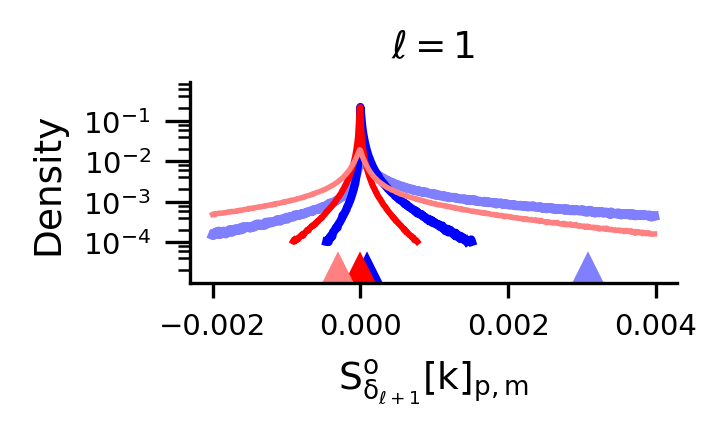

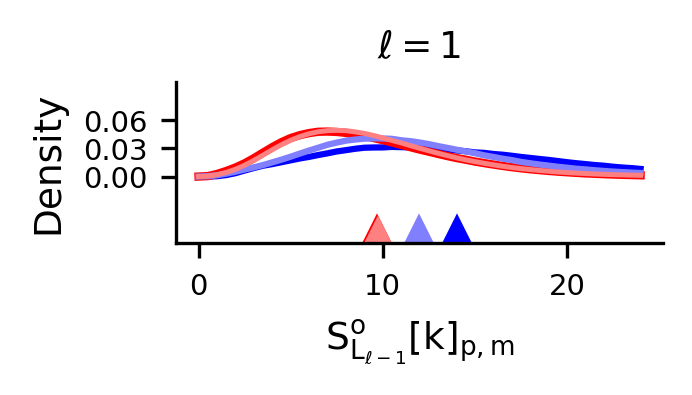

2


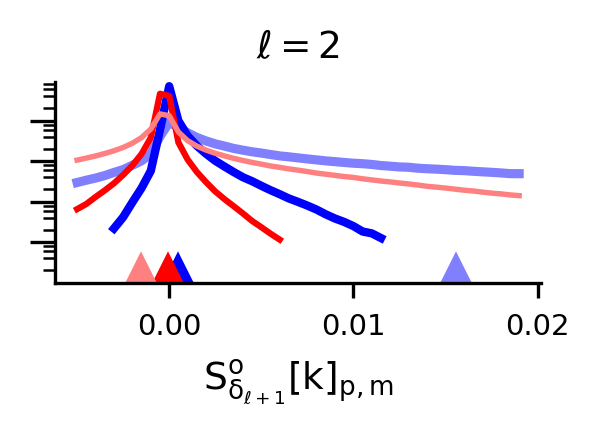

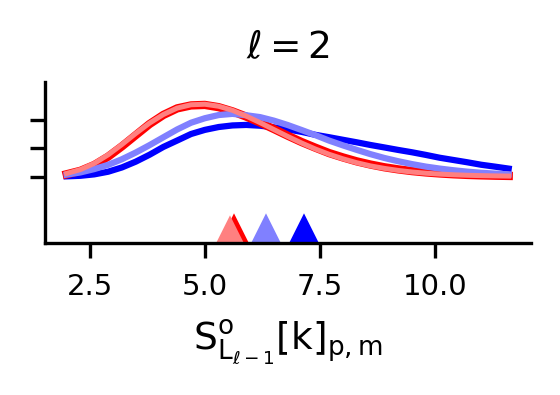

3


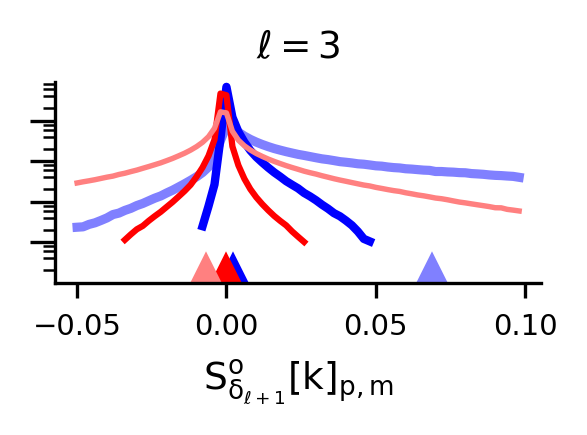

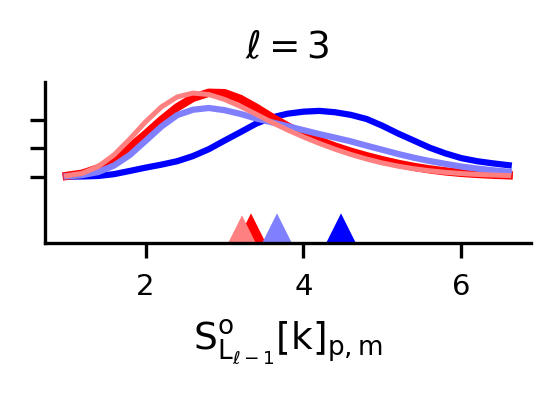

4


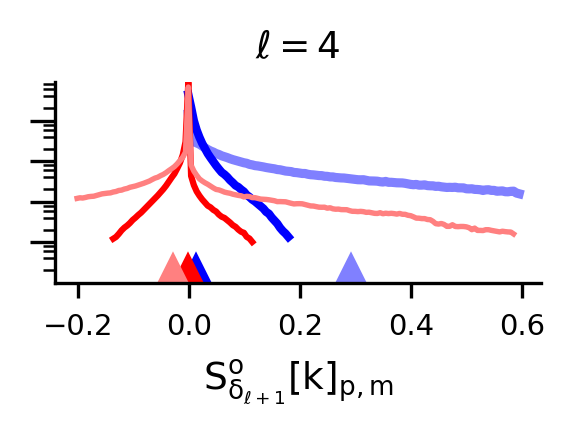

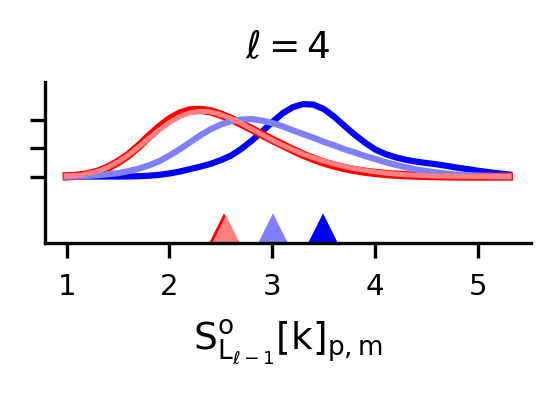

In [ ]:
from matplotlib.ticker import FormatStrFormatter


markersize_=0.5
linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7




# save_model_iterations =  [0,1,2,3,10,11,59,60,61,1199,1200,1201,1230, 1259,1260,1261 ,1499,1500 ,2000,1999 , 5000 , 5001, 5030 , 5002, 5060 , 5061 , 5062]





method = "FA"
str_dir_data_BASE = base_directory_data_str + method + "(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 




iteration_k=800
o=1
rep = 0



net_k = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)



str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
net_k.load_model(str_direction)



net_kmo = my_model.my_network1(  N_layer_list = [225,50,50,50,50,50] , bias=True ,initial_mean=0 , initial_var = 0.1)

iteration_kmo = iteration_k - o

str_direction = str_dir_data_BASE + "network_k_" +  str(iteration_kmo) +  "_" + str(rep) + "_.txt"
net_kmo.load_model(str_direction)



str_direction = str_dir_data_BASE + "code_map_"  +  str(rep) +  ".txt"

with open( str_direction , "rb") as fp:   #Pickling
  code_map = pickle.load(fp)







device0 = code_map[0].device


batch_size=1000
n_data = 1000*7
n_well_classified_data = 600*7
n_poor_classified_data = n_data - n_well_classified_data



train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device0  , code_map = code_map
                                                                                    , flatten = True  , size=15 , shuffle  = False , initial_shuffle = True)


train_dataset = train_loader.dataset
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]


my_coding.device = device0
targets_tensor= my_coding.decode_category(code_map , [train_dataset.tensors[1].to(device0)   ] ).view([-1]  )[0:n_data]
train_tensor = train_dataset.tensors[0].to(device0)  [0:n_data]




L_f_k = net_k.forward(train_tensor)
L_f_kmo = net_kmo.forward(train_tensor)






E_k  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_k 
E_kmo  = train_dataset.tensors[1].to(device)[0:n_data] - L_f_kmo

Delta_fa , Delta_bias_fa = net_k .BP_TRW(E_k ) ########################################################################################## FA
Delta_fa , Delta_bias_fa = net_kmo .BP_TRW(E_kmo ) ########################################################################################## FA




sorted_data , sorted_indices_k  =  torch.sort(    net_k . delta_FA[-1].norm(dim=1) )
sorted_data , sorted_indices_kmo  =  torch.sort(    net_kmo . delta_FA[-1].norm(dim=1))


all_data_k = train_tensor
well_classified_data_k   =  train_tensor[ sorted_indices_k[:n_well_classified_data]  ]
poor_classified_data_k = train_tensor[ sorted_indices_k[  n_well_classified_data  :  ]  ]

all_target_k = targets_tensor
well_classified_target_k   =   targets_tensor[ sorted_indices_k[:n_well_classified_data]  ]
poor_classified_target_k = targets_tensor[ sorted_indices_k[ n_well_classified_data : ]  ]


all_data_kmo = train_tensor
well_classified_data_kmo   =   train_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
poor_classified_data_kmo =   train_tensor[ sorted_indices_kmo[  n_well_classified_data  :  ]  ]

all_target_kmo = targets_tensor
well_classified_target_kmo   =     targets_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
poor_classified_target_kmo = targets_tensor[ sorted_indices_kmo[ n_well_classified_data : ]  ]




#####################
#####################
#####################
for l in range(1,5):

  figsize_ = (figure_width2/3.9*190/168/195*188,figure_width1/4)

  print(l)
  
  delta_lp1_k  =  net_k .delta_FA[l+1]
  delta_lp1_kmo   = net_kmo .delta_FA[l+1]



  if l==1: 
    bins_between_delta = np.arange(  -0.002 ,  0.004, 0.00001)
    bins_within_delta = np.arange(  -0.002 , 0.004, 0.00001)


  if l==2: 
    bins_between_delta = np.arange(  -.005 , .02, 0.0005)
    bins_within_delta = np.arange(  -.005 , .02, 0.0005)


  if l==3: 
    bins_between_delta = np.arange(  -.05 , .1 , 0.002)
    bins_within_delta = np.arange(  -.05 , .1, 0.002)

  if l==4: 
    bins_between_delta = np.arange(  -.201 , .6, 0.005)
    bins_within_delta = np.arange(  -.201 , .6, 0.005)


  hist_within_well  , within_class_sum_well ,  hist_between_well  , between_class_sum_well  , within_class_num_well , between_class_num_well = similarity_histogram2( layer_tensor1 = delta_lp1_k[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , layer_tensor2 = delta_lp1_kmo[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , bins_between = bins_between_delta
                                                                                                                                    , bins_within = bins_within_delta )
  


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  hist_within_well = hist_within_well / within_class_num_well
  hist_between_well = hist_between_well / between_class_num_well


  within_class_mean_well  = within_class_sum_well /  within_class_num_well
  between_class_mean_well  = between_class_sum_well /  between_class_num_well


  # hist_within_well = hist_within_well/hist_within_well.max()
  # hist_between_well = hist_between_well/hist_between_well.max()


  hist_within_well[hist_within_well < 0.0001] =  float('nan')
  hist_between_well[ hist_between_well < 0.0001] =  float('nan')

  plt.plot(  bins_within_delta[0:-1] ,  hist_within_well , color= lighten_color('#0000FF', amount=1) , linewidth=2 , zorder=2)
  plt.plot(  bins_between_delta[0:-1] ,  hist_between_well , color= lighten_color('#FF0000', amount=1) , linewidth=1.5 , zorder=3)

  


###########################################
  hist_within_poor1  , within_class_sum_poor1 ,  hist_between_poor1  , between_class_sum_poor1 , within_class_num_poor1 , between_class_num_poor1 = similarity_histogram2( layer_tensor1 = delta_lp1_k[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , layer_tensor2 = delta_lp1_kmo
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor
                                                                                                                                    , bins_between = bins_between_delta
                                                                                                                                    , bins_within = bins_within_delta )
  


##########################################

  hist_within_poor2  , within_class_sum_poor2 ,  hist_between_poor2  , between_class_sum_poor2 , within_class_num_poor2 , between_class_num_poor2 = similarity_histogram2( layer_tensor1 = delta_lp1_k
                                                                                                                                    , layer_tensor2 = delta_lp1_kmo[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , bins_between = bins_between_delta
                                                                                                                                    , bins_within = bins_within_delta )
  



  hist_within_poor = hist_within_poor2 + hist_within_poor1
  hist_between_poor = hist_between_poor2 + hist_between_poor1

  within_class_sum_poor = within_class_sum_poor2 + within_class_sum_poor1
  between_class_sum_poor = between_class_sum_poor2 + between_class_sum_poor1


  within_class_num_poor = within_class_num_poor2 + within_class_num_poor1
  between_class_num_poor = between_class_num_poor2 + between_class_num_poor1


  within_class_mean_poor  = within_class_sum_poor /  within_class_num_poor
  between_class_mean_poor  = between_class_sum_poor /  between_class_num_poor




  hist_within_poor = hist_within_poor / within_class_num_poor
  hist_between_poor = hist_between_poor / between_class_num_poor


  # hist_within_poor = hist_within_poor/hist_within_poor.max()
  # hist_between_poor = hist_between_poor/hist_between_poor.max()




  hist_within_poor[hist_within_poor < 0.0001] =  float('nan')
  hist_between_poor[ hist_between_poor < 0.0001 ] =  float('nan')

  plt.plot(  bins_within_delta[0:-1] ,  hist_within_poor , color= lighten_color('#0000FF', amount=0.5) , linewidth=2.2 , zorder=0)
  plt.plot(  bins_between_delta[0:-1] ,  hist_between_poor , color= lighten_color('#FF0000', amount=0.5) , linewidth=1.3 , zorder=5)



###########################################
  ax = plt.gca()       

  ymin, ymax = ax.get_ylim()

  ymin = ymin - (ymax - ymin)/4
                   


  plt.plot(  within_class_mean_well ,  [0.00001] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=1) ,  markerfacecolor = lighten_color('#0000FF', amount=1) , markersize = 13 )
  plt.plot( between_class_mean_well ,  [0.00001] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=1), markerfacecolor = lighten_color('#FF0000', amount=1) , markersize = 13 )
  
  plt.plot(  within_class_mean_poor ,  [0.00001] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=0.5) ,  markerfacecolor = lighten_color('#0000FF', amount=0.5) , markersize = 13 )
  plt.plot( between_class_mean_poor ,  [0.00001] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=0.5), markerfacecolor = lighten_color('#FF0000', amount=0.5) , markersize = 13 )

  plt.xlabel(r"$ S^o_{\delta_{\ell+1}}[k]_{p,m}  $", fontsize= plt_fontsize_title_)
  if l==1  :  plt.ylabel(r"Density", fontsize= plt_fontsize_title_)

  plt.title(r'$\ell=$' + str(l) , fontsize= plt_fontsize_title_   )
  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  # ax.spines['left'].set_color('none')
  
  ax.xaxis.set_ticks_position('bottom')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  

  plt.yscale('log')

  

  # ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

  plt.ylim([0.00001 , 0.9])
  
  
  ax.tick_params(axis='y', labelsize=7)
  
  plt.tick_params(axis='y', which='minor')
  
  plt.yticks([ 0.1 , 0.01 , 0.001 , 0.0001 ])

  ax = plt.gca()

  # locmaj = matplotlib.ticker.LogLocator( base=10 , subs = ( -1 ) , numticks=3) 
  # ax.yaxis.set_major_locator(locmaj)


  ax.tick_params(axis='y' , which='minor', length=3, color='k')

  ax.tick_params(axis='y' , which='major', length=6, color='k')


  locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=15)
  ax.yaxis.set_minor_locator(locmin)
  ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


  if l!=1:  ax.set_yticklabels([])


  # locmin = matplotlib.ticker.LogLocator( base=10 , numticks=50)
  # locmin = matplotlib.ticker.LogLocator(base=10 ,subs=(0.2,0.4,0.6,0.8) , numticks=4)

  # ax.yaxis.set_minor_locator(locmin)
  # ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

  # plt.yticks([0.1, 0.01,0.001])
  

  # if l==2: plt.xlim([-0.014,0.041])
  # if l==3: plt.xlim([-0.15,0.25])
  # if l==4: plt.xlim([-0.6,1])
  # # if l==5: plt.xlim([-1 , 2])


  plt.savefig( base_directory_figure_str + '/hist_delta_late_poor_well_' + str(l) + '.jpg' 
              , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001  ) 



  plt.show()










  hist_between_well_delta = hist_between_well
  hist_within_well_delta = hist_within_well


























#####################  output signals
  figsize_ = (figure_width2/3.9*190/168/195*188,figure_width1/5)


  L_lm1_k  =  net_k .L[l-1]
  L_lm1_kmo   = net_kmo .L[l-1]

  if l == 1 :
    bins_between_L = np.arange(0,25,0.5)
    bins_within_L = np.arange(0,25,0.5)
  

  if l == 2 :
    bins_between_L = np.arange(2,12,0.3)
    bins_within_L = np.arange(2,12,0.3)

  if l == 3 :
    bins_between_L = np.arange(1,7 ,0.2)
    bins_within_L = np.arange(1,7 ,0.2)


  if l == 4 :
    bins_between_L = np.arange(1,5.5,0.1)
    bins_within_L = np.arange(1,5.5,0.1)





  hist_within_well  , within_class_sum_well ,  hist_between_well  , between_class_sum_well  , within_class_num_well , between_class_num_well = similarity_histogram2( layer_tensor1 = L_lm1_k[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , layer_tensor2 = L_lm1_kmo[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[:n_well_classified_data]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[:n_well_classified_data]  ]
                                                                                                                                    , bins_between = bins_between_L
                                                                                                                                    , bins_within = bins_within_L )
  


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  hist_within_well = hist_within_well / within_class_num_well
  hist_between_well = hist_between_well / between_class_num_well


  within_class_mean_well  = within_class_sum_well /  within_class_num_well
  between_class_mean_well  = between_class_sum_well /  between_class_num_well

  # hist_within_well[hist_within_well < 0.000001] =  float('nan')
  # hist_between_well[ hist_between_well < 0.000001] =  float('nan')

  plt.plot(  bins_within_L[0:-1] ,  hist_within_well , color= lighten_color('#0000FF', amount=1) , linewidth=1.5)
  plt.plot(  bins_between_L[0:-1] ,  hist_between_well , color= lighten_color('#FF0000', amount=1) , linewidth=2)

  


###########################################
  hist_within_poor1  , within_class_sum_poor1 ,  hist_between_poor1  , between_class_sum_poor1 , within_class_num_poor1 , between_class_num_poor1 = similarity_histogram2( layer_tensor1 = L_lm1_k[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , layer_tensor2 = L_lm1_kmo
                                                                                                                                    , targets_tensor1 =  targets_tensor[ sorted_indices_k[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor2 =  targets_tensor
                                                                                                                                    , bins_between = bins_between_L
                                                                                                                                    , bins_within = bins_within_L )
  


###########################################

  hist_within_poor2  , within_class_sum_poor2 ,  hist_between_poor2  , between_class_sum_poor2 , within_class_num_poor2 , between_class_num_poor2 = similarity_histogram2( layer_tensor1 = L_lm1_k
                                                                                                                                    , layer_tensor2 = L_lm1_kmo[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , targets_tensor1 =  targets_tensor
                                                                                                                                    , targets_tensor2 =  targets_tensor[ sorted_indices_kmo[n_well_classified_data:]  ]
                                                                                                                                    , bins_between = bins_between_L
                                                                                                                                    , bins_within = bins_within_L)
  



  hist_within_poor = hist_within_poor2 + hist_within_poor1
  hist_between_poor = hist_between_poor2 + hist_between_poor1

  within_class_sum_poor = within_class_sum_poor2 + within_class_sum_poor1
  between_class_sum_poor = between_class_sum_poor2 + between_class_sum_poor1


  within_class_num_poor = within_class_num_poor2 + within_class_num_poor1
  between_class_num_poor = between_class_num_poor2 + between_class_num_poor1


  within_class_mean_poor  = within_class_sum_poor /  within_class_num_poor
  between_class_mean_poor  = between_class_sum_poor /  between_class_num_poor




  hist_within_poor = hist_within_poor / within_class_num_poor
  hist_between_poor = hist_between_poor / between_class_num_poor



  # hist_within_poor[hist_within_poor < 0.000001] =  float('nan')
  # hist_between_poor[ hist_between_poor < 0.000001] =  float('nan')

  plt.plot(  bins_within_L[0:-1] ,  hist_within_poor , color= lighten_color('#0000FF', amount=0.5) , linewidth=1.5)
  plt.plot(  bins_between_L[0:-1] ,  hist_between_poor , color= lighten_color('#FF0000', amount=0.5) , linewidth=1.2)



###########################################
  ax = plt.gca()       

  ymin, ymax = ax.get_ylim()

  ymin = ymin - (ymax - ymin)/4
                   

  if l==1 :markersize_ = 13
  if l!=1 :markersize_ = 13
  ymin = -0.07
  plt.ylim([ymin , 0.1])


  plt.plot(  within_class_mean_well ,  [ymin] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=1) 
  ,  markerfacecolor = lighten_color('#0000FF', amount=1) , markersize = 12 )
  plt.plot( between_class_mean_well ,  [ymin] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=1)
  , markerfacecolor = lighten_color('#FF0000', amount=1) , markersize = 12 )
  
  plt.plot(  within_class_mean_poor ,  [ymin] , '^' ,markeredgecolor = lighten_color('#0000FF', amount=0.5) 
  ,  markerfacecolor = lighten_color('#0000FF', amount=0.5) , markersize = 12 )
  plt.plot( between_class_mean_poor ,  [ymin-0.002] , '^' ,markeredgecolor = lighten_color('#FF0000', amount=0.5)
  , markerfacecolor = lighten_color('#FF0000', amount=0.5) , markersize = 12 )

  plt.xlabel(r"$ S^o_{L_{\ell-1}}[k]_{p,m}  $", fontsize= plt_fontsize_title_)
  if l==1 :  plt.ylabel(r"Density", fontsize= plt_fontsize_title_)


  plt.title(r'$\ell=$' + str(l) , fontsize= plt_fontsize_title_   )
  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  # ax.spines['left'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=7)

  
  plt.yticks([0,0.03 , 0.06])

  if l!=1:  ax.set_yticklabels([])

  # if l==2: plt.xlim([-0.014,0.041])
  # if l==3: plt.xlim([-0.15,0.25])
  # if l==4: plt.xlim([-0.6,1])
  # # if l==5: plt.xlim([-1 , 2])


  plt.savefig( base_directory_figure_str + '/hist_L_late_poor_well_' + str(l) + '.jpg' 
              , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001  ) 


  plt.show()


